Doing Clustering on 2000 audios files using k-means cluster and support vector machine (SVM)

Names clarification

after extracting new features from the original features.
The original features:

energy
pulse
tone
noise

The new features are 24 features, the first 6 extracted from energy, the second 6 features from pulse,.. and so on

dataSet_high[:,0:6] exctracted from energy

dataSet_high[:,6:12] exctracted from pulse

dataSet_high[:,12:18] exctracted from tone

dataSet_high[:,18:24] exctracted from noise

when I mention energy feature I mean the features extracted from energy ..etc.

prepare all the library needed for doing machine learning 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import matplotlib as mpl
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA, PCA
from sklearn import decomposition
import os
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix ,accuracy_score



hdf5_file = None


def read_data(file_name):
    data = pd.read_csv(file_name)
    return data
    

def open_hdf5_file(hdf5Files):
    global hdf5_file
    hdf5_file = h5py.File(str(hdf5Files) ,'r') 
    keys_list=list(hdf5_file.keys())
    return keys_list


def open_as_dataframe(DataframeData):
    global hdf5_file
    data_file =list(hdf5_file[str(DataframeData)])
    return data_file



['energy', 'noise', 'pulse', 'tone']


/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


<Figure size 7200x7200 with 0 Axes>

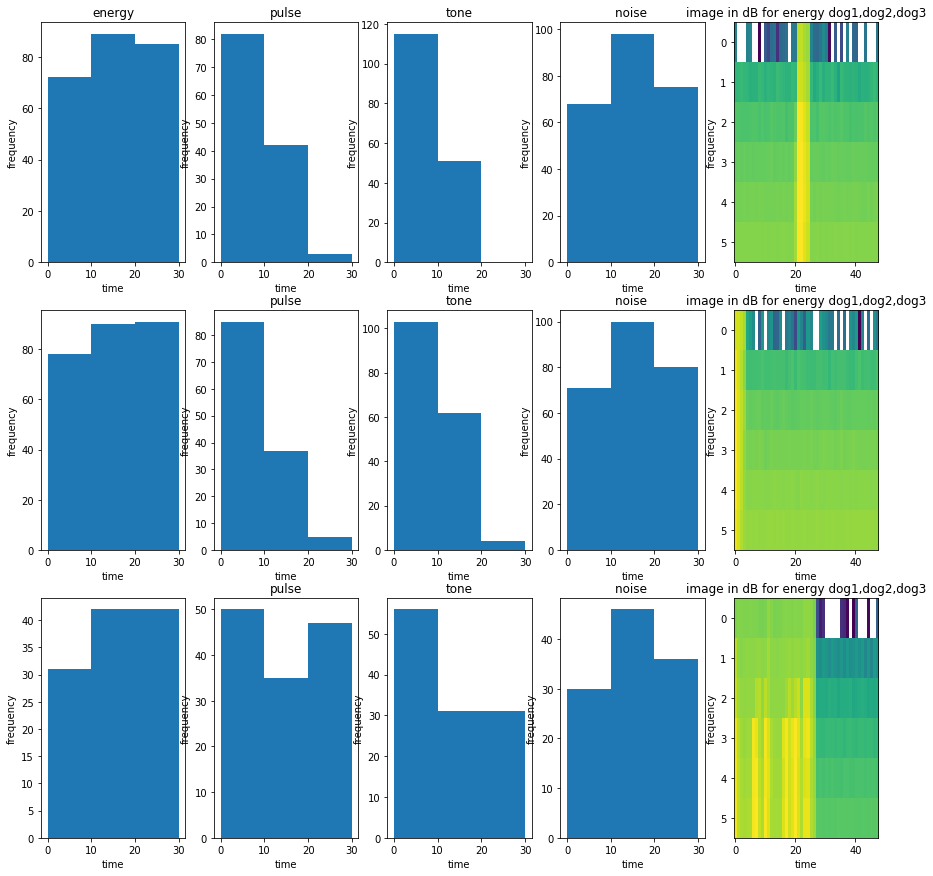

In [2]:
# Visualization of three dogs sounds 
f1 = h5py.File('1-100032-A-0.wav.1.hdf5' ,'r') # dog 1
ls=list(f1.keys())
print(ls)

f2 = h5py.File('1-110389-A-0.wav.1.hdf5' ,'r') # dog 2
ls=list(f2.keys())

f3 = h5py.File('5-9032-A-0.wav.1.hdf5' ,'r') # dog 3
ls=list(f3.keys())


df1=np.array(f1['energy']) #dog 1
df2=np.array(f2['energy']) #dog 2
df3=np.array(f3['energy']) #dog 3

sp1=np.array(f1['pulse']) #dog 1
sp2=np.array(f2['pulse']) #Dog2
sp3=np.array(f3['pulse']) #dog3

t1=np.array(f1['tone']) #dog 1
t2=np.array(f2['tone']) #Dog2
t3=np.array(f3['tone']) #dog3

n1=np.array(f1['noise']) #dog 1
n2=np.array(f2['noise']) #Dog2
n3=np.array(f3['noise']) #dog3


## histtogram for energy feature for sound dog1,dog2,dog3
fig= plt.figure(figsize=(100,100))
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(15,15))
# axes[0][0].set_title('energy')
axes[0][0].hist(df1.flatten(), bins=[0,10,20,30])
axes[1][0].hist(df2.flatten(), bins=[0,10,20,30])
axes[2][0].hist(df3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[0][0].set_title('energy')
    axes[i][0].set_xlabel('time')
    axes[i][0].set_ylabel('frequency')


## histtogram for pulse feature for sound dog1,dog2,dog3
# axes[0][1].set_title('pulse')
axes[0][1].hist(sp1.flatten(), bins=[0,10,20,30])
axes[1][1].hist(sp2.flatten(), bins=[0,10,20,30])
axes[2][1].hist(sp3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[i][1].set_title('pulse')
    axes[i][1].set_xlabel('time')
    axes[i][1].set_ylabel('frequency')
    
## histtogram for tone feature for sound dog1,dog2,dog3 
# axes[0][2].set_title('tone')
axes[0][2].hist(t1.flatten(), bins=[0,10,20,30])
axes[1][2].hist(t2.flatten(), bins=[0,10,20,30])
axes[2][2].hist(t3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[i][2].set_title('tone')
    axes[i][2].set_xlabel('time')
    axes[i][2].set_ylabel('frequency')

## histtogram for noise feature for sound dog1,dog2,dog3
#axes[0][3].set_title('noise ')
axes[0][3].hist(n1.flatten(), bins=[0,10,20,30])
axes[1][3].hist(n2.flatten(), bins=[0,10,20,30])
axes[2][3].hist(n3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[i][3].set_title('noise ')
    axes[i][3].set_xlabel('time')
    axes[i][3].set_ylabel('frequency')

## image in dB energy feature for sound dog1,dog2,dog3
#axes[0][4].set_title('image in dB for energy dog1,dog2,dog3')
axes[0][4].imshow(np.log(df1),aspect='auto')
axes[1][4].imshow(np.log(df2),aspect='auto')
axes[2][4].imshow(np.log(df3),aspect='auto')
for i in range(3):
    axes[i][4].set_title('image in dB for energy dog1,dog2,dog3')
    axes[i][4].set_xlabel('time')
    axes[i][4].set_ylabel('frequency')

plt.show()

/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarnin

<Figure size 7200x7200 with 0 Axes>

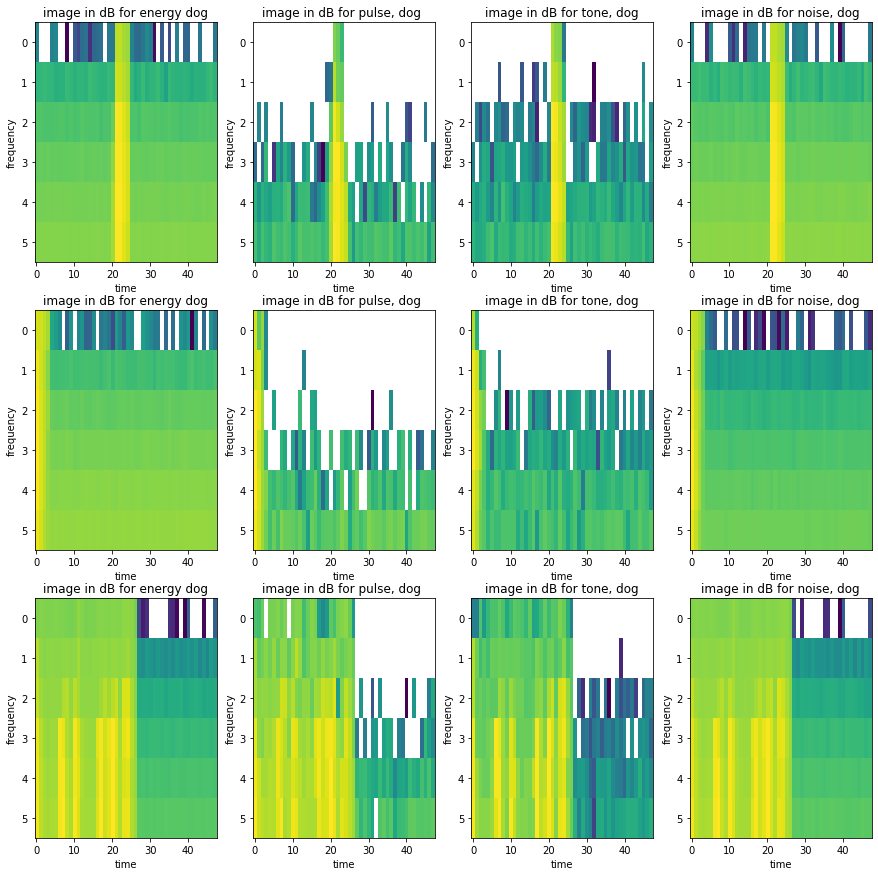

In [10]:
## image in dB for three sounds of three dogs
#just for visualization
fig= plt.figure(figsize=(100,100))
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(15,15))


## image in dB energy feature for the three sounds
#axes[0][0].set_title('image for energy of the three dogs')
axes[0][0].imshow(np.log(df1),aspect='auto')
axes[1][0].imshow(np.log(df2),aspect='auto')
axes[2][0].imshow(np.log(df3),aspect='auto')
for i in range(3):
    axes[i][0].set_title('image in dB for energy dog')
    axes[i][0].set_xlabel('time')
    axes[i][0].set_ylabel('frequency')

## image in dB pulse feature for the three sounds
#axes[0][1].set_title('image for pulse of the three dogs')
axes[0][1].imshow(np.log(sp1),aspect='auto')
axes[1][1].imshow(np.log(sp2),aspect='auto')
axes[2][1].imshow(np.log(sp3),aspect='auto')
for i in range(3):
    axes[i][1].set_title('image in dB for pulse, dog ')
    axes[i][1].set_xlabel('time')
    axes[i][1].set_ylabel('frequency')

## image in dB tone feature for the three sounds
#axes[0][2].set_title('image for tone of the three dogs')
axes[0][2].imshow(np.log(t1),aspect='auto')
axes[1][2].imshow(np.log(t2),aspect='auto')
axes[2][2].imshow(np.log(t3),aspect='auto')
for i in range(3):
    axes[i][2].set_title('image in dB for tone, dog')
    axes[i][2].set_xlabel('time')
    axes[i][2].set_ylabel('frequency')

## image in dB noise feature for the three sounds
#axes[0][3].set_title('image for noise of the three dogs')
axes[0][3].imshow(np.log(n1),aspect='auto')
axes[1][3].imshow(np.log(n2),aspect='auto')
axes[2][3].imshow(np.log(n3),aspect='auto')
for i in range(3):
    axes[i][3].set_title('image in dB for noise, dog')
    axes[i][3].set_xlabel('time')
    axes[i][3].set_ylabel('frequency')

plt.show()

 # From the visualization above it seems that the files are missing values. These are the original files 

In [2]:
##  read the meta data 
metadata=read_data("esc50.csv")
print(metadata)

# The 2000 labels 
category=metadata['category']   ### 2000  labels 
#[B]

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]


In [3]:
## Number of classes 
Category=category.unique() 
print(Category)  ### there are 50 labels , basically we have 5 classes each class has 400 different sounds 



### the labels of 2000 files based on 50 labels
true_labels=metadata['target'] 
print(true_labels.shape)


###[1]

['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']
(2000,)


In [4]:
## datafilename using os.path
thisdir= os.getcwd()

datafilename=list()
for r, d, f in os.walk(thisdir):
    for file in f:
        if ".hdf5" in file:
            data=os.path.join( file)
            datafilename.append(data)

#print(datafilename)

In [5]:

# extract features from 2000 files 

energy_data=list()
noise_data=list()
tone_data=list()
pulse_data=list()
energy_data_high=list()
noise_data_high=list()
tone_data_high=list()
pulse_data_high=list()
opened_dataframe=list()

### using percentile to get rid of time parameter, after sorting data in ascending way 
#[https://github.com/tdunning/t-digest/blob/master/docs/t-digest-paper/histo.pdf]

for data in datafilename:
    ls1=open_hdf5_file(data) #('energy','pulse','noise','tone')
    for index in ls1:
        if str(index)=='energy': 
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_energy_data=np.percentile(sortedarr, 95, axis=1) # percentage along row 
            energy_data.append(percentile_energy_data)
            

        elif str(index)=='noise':
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_noise_data=np.percentile(sortedarr, 95, axis=1)
            noise_data.append(percentile_noise_data)
           

        elif str(index)=='pulse':
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_pulse_data=np.percentile(sortedarr, 95, axis=1)
            pulse_data.append(percentile_pulse_data)
            

        elif str(index)=='tone':
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_tone_data=np.percentile(sortedarr, 95, axis=1)
            tone_data.append(percentile_tone_data)   
           
            
    energy_data_high=np.vstack(energy_data)
    noise_data_high=np.vstack(noise_data)
    pulse_data_high=np.vstack(pulse_data)
    tone_data_high=np.vstack(tone_data)


print("length of the energy data",energy_data_high.shape)#,np.size(energy_data,1))
#print("the first row of the energy data array",energy_data)

print("length of the noise data",noise_data_high.shape)#,np.size(noise_data,1)
#print("the first row of the noise data array",noise_data[0])

print("length of the tone data",tone_data_high.shape)#,np.size(tone_data,1)
#print("the first row of the tone data array",tone_data[0])

print("length of the pulse data",pulse_data_high.shape)#,np.size(pulse_data,1)
#print("the  pulse data array",pulse_data[0])
 

length of the energy data (2000, 6)
length of the noise data (2000, 6)
length of the tone data (2000, 6)
length of the pulse data (2000, 6)


In [7]:
### build the dataset matrix and stacked the 24 features that extracted
#from (energy,pulse,tone,noise) for percentile 95%
dataSet_high=np.hstack([energy_data_high,pulse_data_high,tone_data_high,noise_data_high])

print(dataSet_high.shape)


(2000, 24)


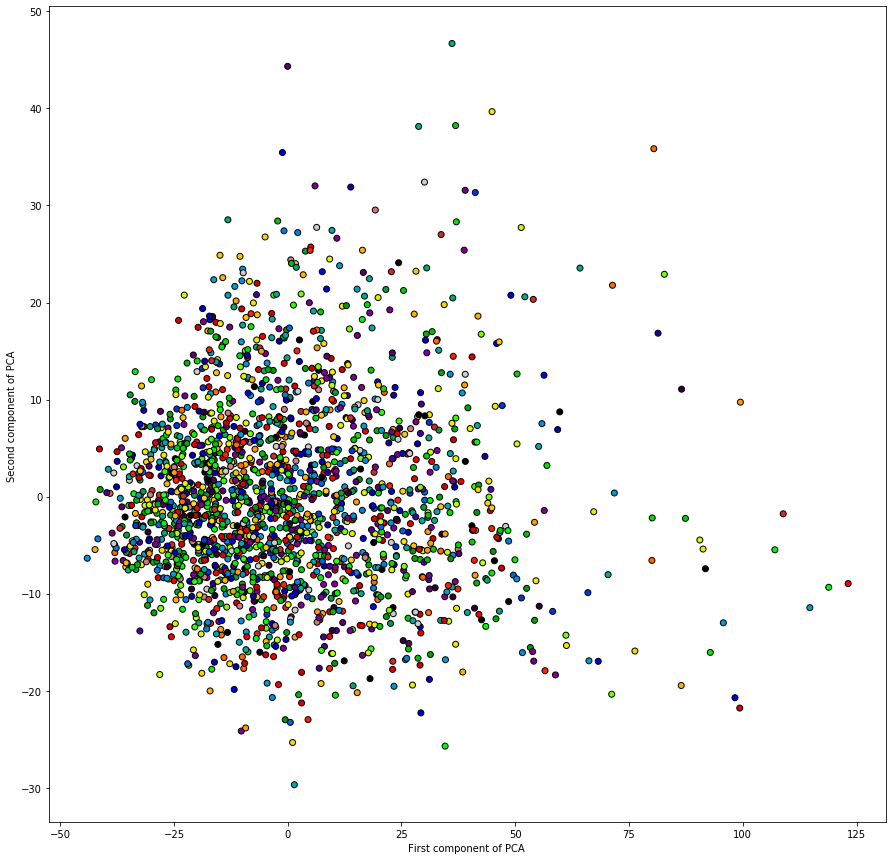

 Figure 1
 From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters 


In [11]:
### trying to visualize if PCA can make groups from the data
### PCA for the whole dataSet 
from sklearn import decomposition

X = dataSet_high[:,0:3] #the first three features
y = true_labels

fig = plt.figure(1, figsize=(15, 15))
plt.clf()


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.xlabel('First component of PCA ')
plt.ylabel('Second component of PCA ')
plt.show()

print(" Figure 1")

print(''' From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters ''')
#[2]

In [29]:
print (pca.explained_variance_ratio_)

[0.63408575 0.19060145 0.05627553]


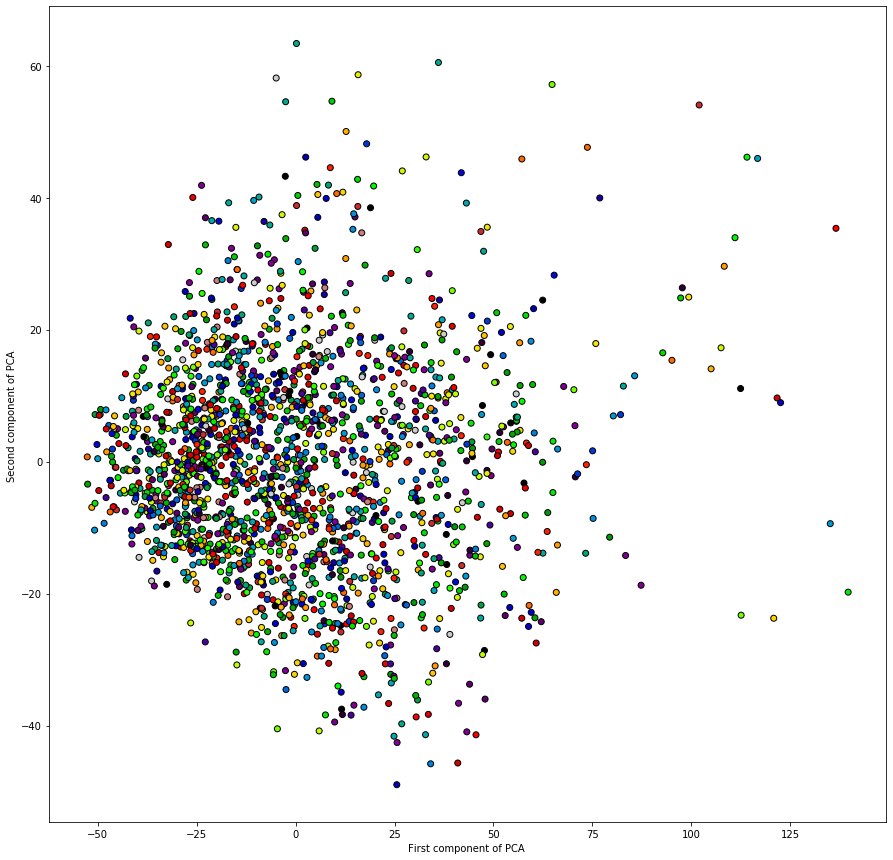

 Figure 1
 From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters 


In [14]:
### trying to visualize if PCA can make groups from the data
# for the energy data
from sklearn import decomposition

X = dataSet_high[:,0:6] # excluding noise from the data 
y = true_labels

fig = plt.figure(1, figsize=(15, 15))
plt.clf()


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.xlabel('First component of PCA ')
plt.ylabel('Second component of PCA ')
plt.show()

print(" Figure 1")

print(''' From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters ''')
#[2]

In [15]:
print (pca.explained_variance_ratio_)

[0.68755086 0.20810998 0.05631995]


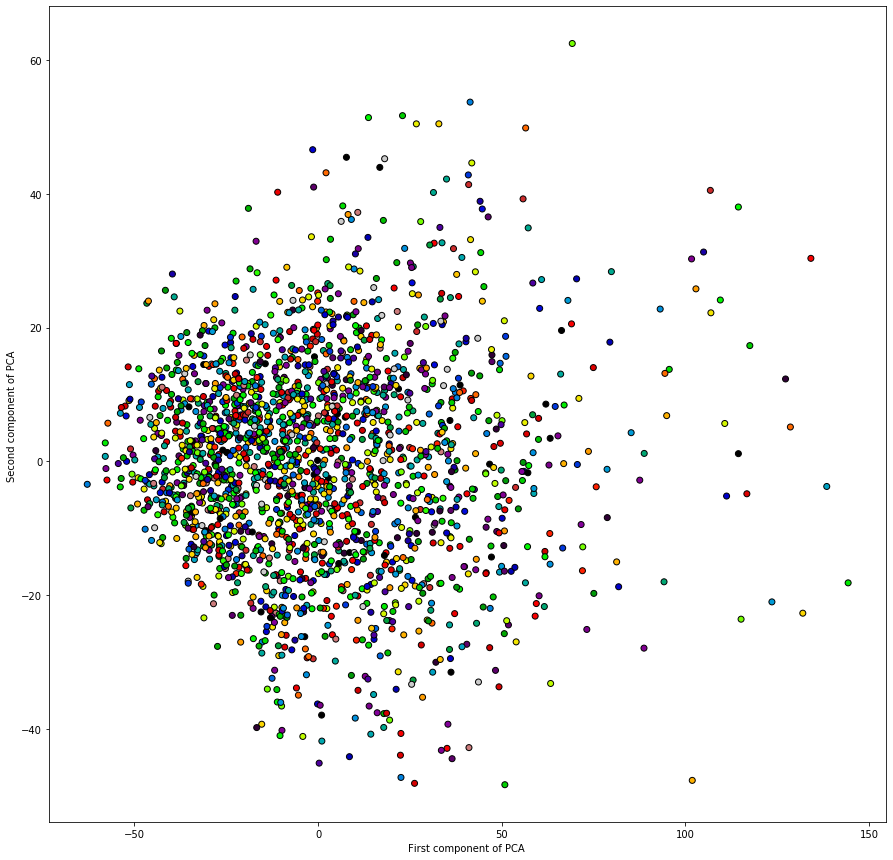

 Figure 1
 From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters 


In [16]:
### trying to visualize if PCA can make grouping for the data
#on the pulse 
from sklearn import decomposition

X = dataSet_high[:,6:12] # excluding noise from the data 
y = true_labels

fig = plt.figure(1, figsize=(15, 15))
plt.clf()


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.xlabel('First component of PCA ')
plt.ylabel('Second component of PCA ')
plt.show()

print(" Figure 1")

print(''' From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters ''')
#[2]

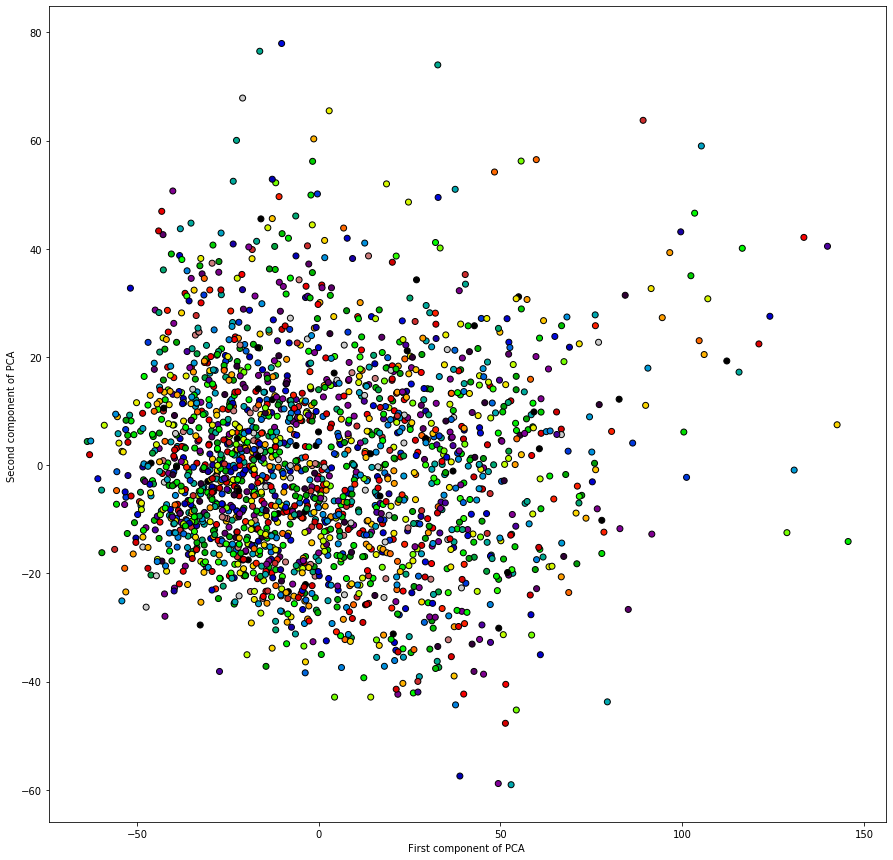

 Figure 1
 From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters 


In [17]:
### trying to visualize if PCA can make grouping for the data
#on the tone
from sklearn import decomposition

X = dataSet_high[:,12:18] # excluding noise from the data 
y = true_labels

fig = plt.figure(1, figsize=(15, 15))
plt.clf()


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.xlabel('First component of PCA ')
plt.ylabel('Second component of PCA ')
plt.show()

print(" Figure 1")

print(''' From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters ''')
#[2]

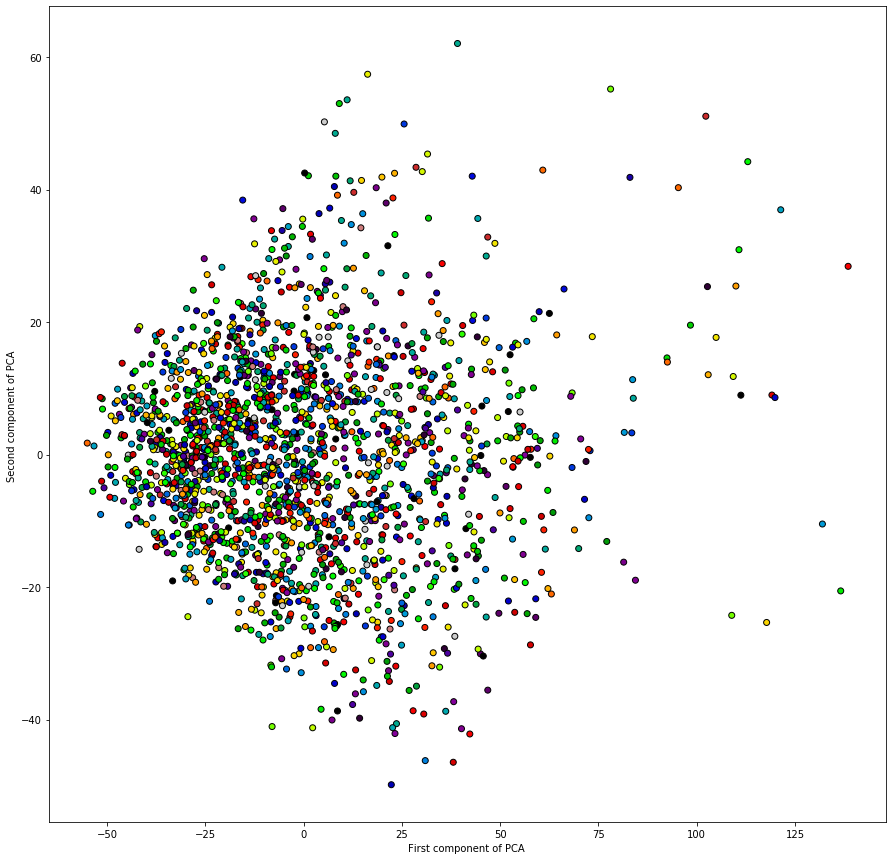

 Figure 1
 From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters 


In [18]:
### trying to visualize if PCA can make grouping for the data
#on the noise
from sklearn import decomposition

X = dataSet_high[:,18:24] # excluding noise from the data 
y = true_labels

fig = plt.figure(1, figsize=(15, 15))
plt.clf()


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.xlabel('First component of PCA ')
plt.ylabel('Second component of PCA ')
plt.show()

print(" Figure 1")

print(''' From the plot between PCA1 and PCA2 excluding noise, we can see that the data 
         is not easy to be grouped and also is not applicable to be seperated 
         as clusters ''')
#[2]

In [33]:
print (pca.explained_variance_ratio_)

[0.89507352 0.05140856 0.01796567]


# As a first sight on the PCA plot,it seems that the data is distributed as it is not easy to make groups and clusters. The analysis clearly shows that PCA has the potential to perform feature selection and is able to select a number of important individuals from all the feature components.
[Feature Selection Using Principal Component Analysis](https://www.researchgate.net/publication/224196395_Feature_Selection_Using_Principal_Component_Analysis)

In [35]:

#### visualize the data using pair plot  for dataset_high
#### another way to see  which feature are more representative 

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high, category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        'c7','c8','c9','c10','c11','c12',
                                        'c13','c14','c15','c16','c17','c18',
                                        'c19','c20','c21','c22','c23','c24',])

features['labels']= y_train

print(features)

              c1          c2          c3          c4          c5          c6  \
0      96.031535   93.982763   96.363331   99.279179  101.505183  104.814483   
1      92.200187   95.608600  101.842342  102.501961   99.168525   95.951326   
2      95.604182  100.146136  103.964451  101.439931   98.130906   91.406951   
3      86.164896   89.951950   85.936787   82.958893   84.025899   86.395946   
4     100.604255   99.582645  100.528089  102.928780  106.222527  109.758122   
...          ...         ...         ...         ...         ...         ...   
1495   57.651727   64.470531   80.987289   96.614545   94.951830  101.790343   
1496   78.920909   88.528815   94.984971   97.657754  101.352261  106.447198   
1497   91.401637   84.176178   80.202699   83.485815   78.539079   86.781591   
1498   78.163071  103.831055  100.552832   97.997905   95.564917   93.340993   
1499   92.131221   89.828647   91.088696   90.576005   83.741465   76.967741   

             c7         c8         c9  

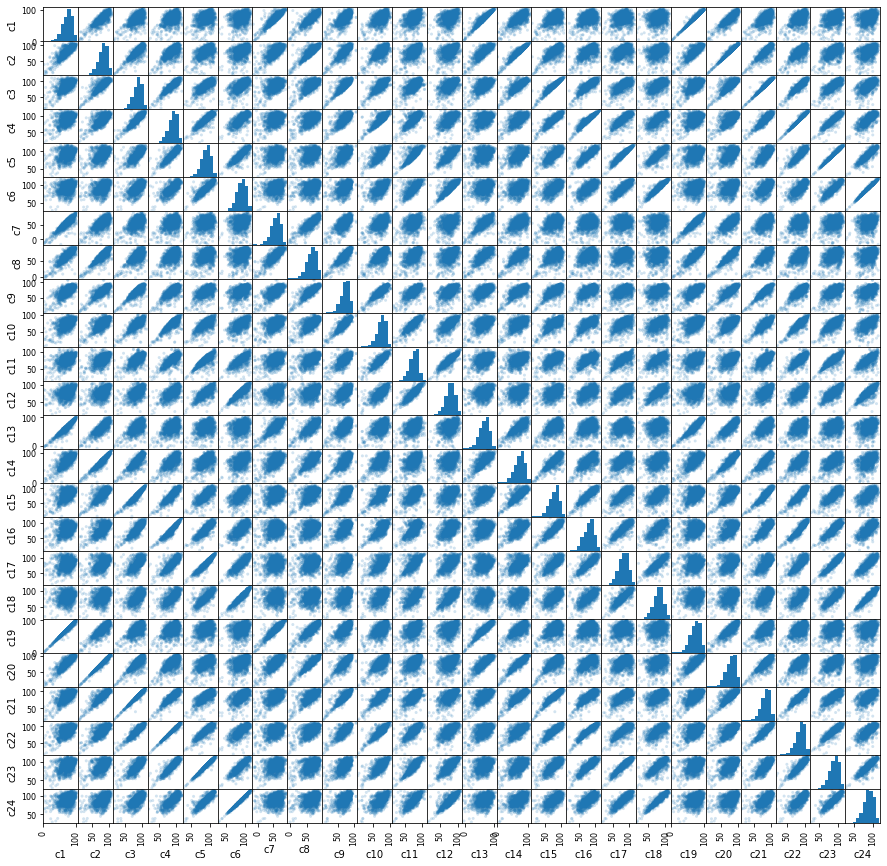

Figure 2
visualize the data using pair plot


In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2')
print('visualize the data using pair plot')

##[3]

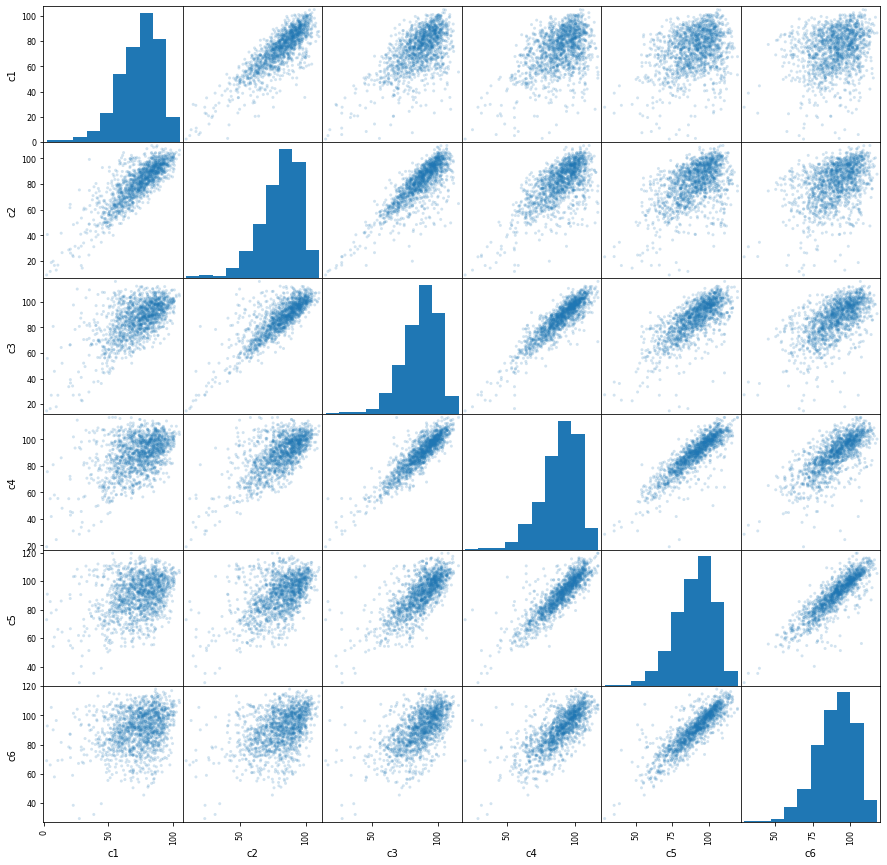

Figure 2b
visualize the data using pair plot


In [23]:

#### visualize the data using pair plot 
# energy

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,0:6], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

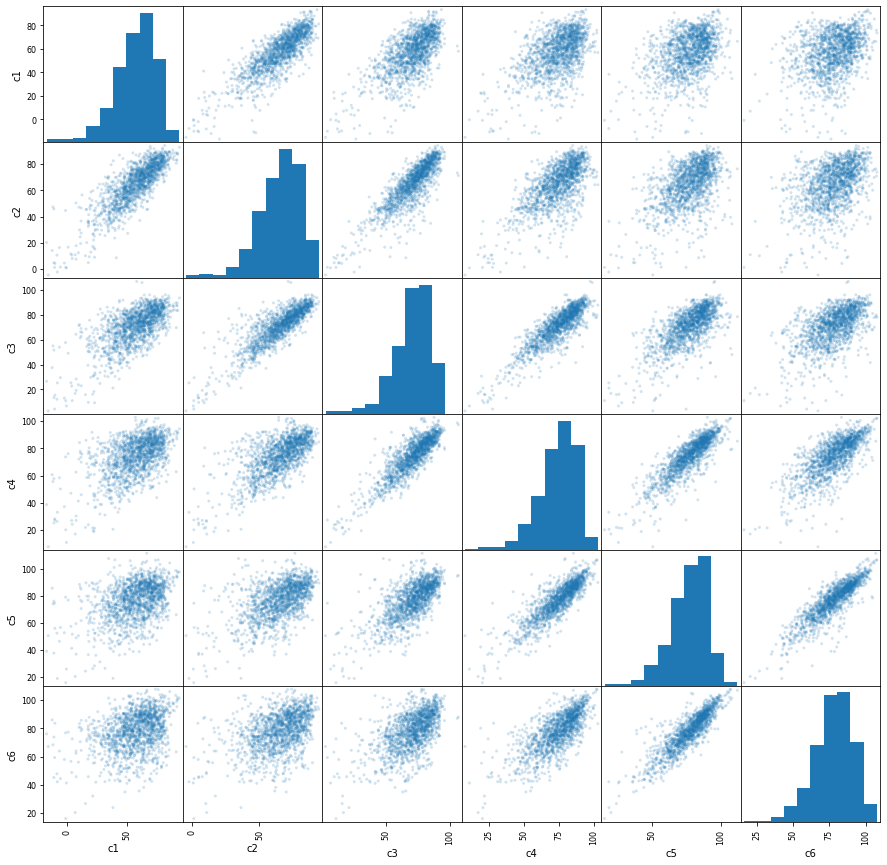

Figure 2b
visualize the data using pair plot


In [24]:

#### visualize the data using pair plot 
# pulse

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,6:12], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

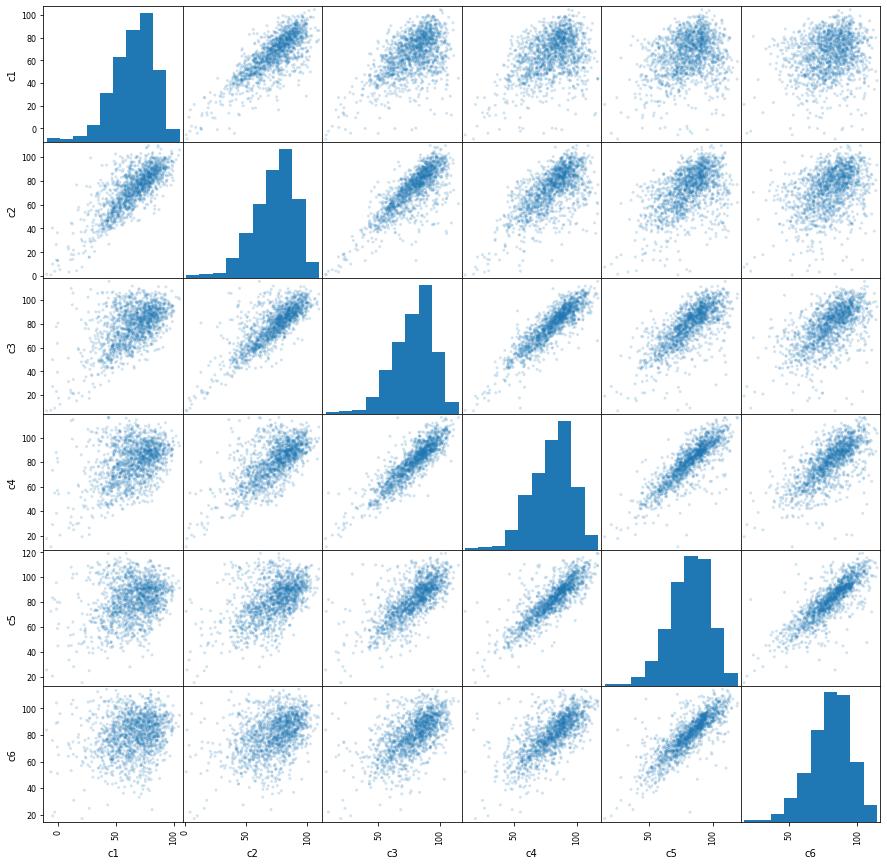

Figure 2b
visualize the data using pair plot


In [25]:

#### visualize the data using pair plot 
# tone

#prepare the data for visualization using pandas data frame
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,12:18], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

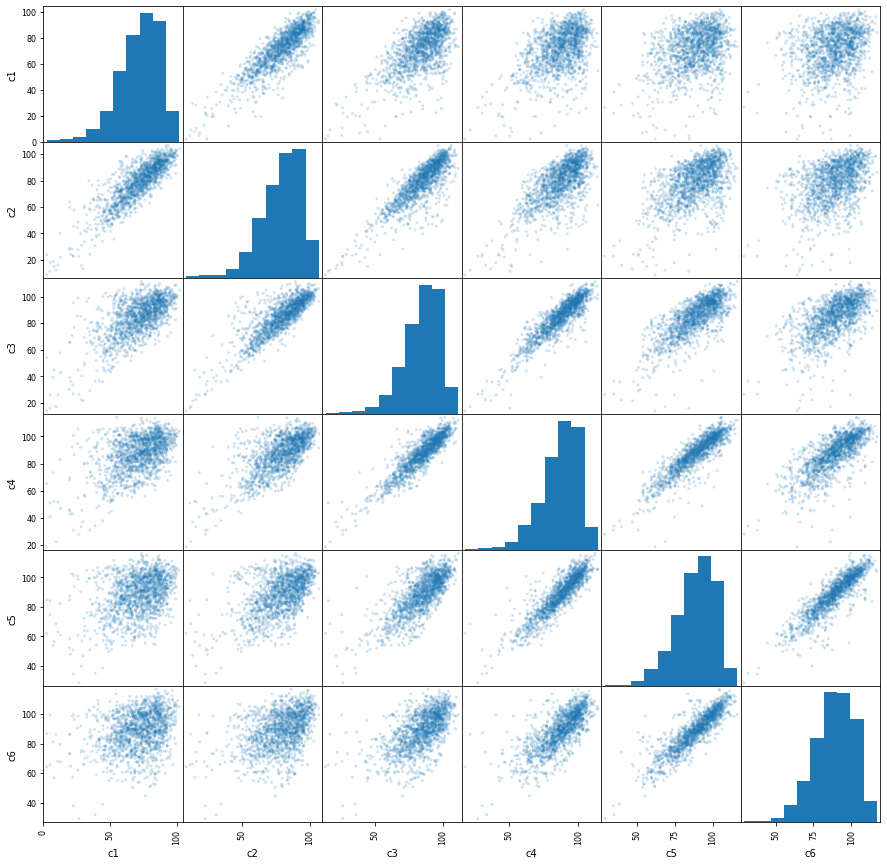

Figure 2b
visualize the data using pair plot


In [26]:

#### visualize the data using pair plot 
# noise

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,18:24], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

# Figures 1,2,2a,2b are visualization for the raw data,and to see if it's applicable to process the data easily, and make a good model for prediction, but it is obvious that the dataSet is distributed  in a way that makes clustering and grouping difficult. 
# It can be noticed that the shape of the data  for some of the features is almost stretched towards diagonal.

## Ploting ROC (region under curve) helps us to know which classifier is better than the other, unfortunatelly, I got this error"multiclass format is not supported" , which means a classification task with more than two classes;
and since we have 50 classes it's not easy to make ROC curve. and ROC is just for binary cases, or one to multi case.

[https://scikit-learn.org/stable/modules/multiclass.html]

# In the book Introduction to machine learning with Python,Andreas C. Muller and Sarah Guido ,
# It says "multiclass classification results are harder to understand than binary classification results,.., common tools are the confusion matrix and the classification report " which I already used.

In [7]:
#However, when  trying to use roc_auc_score on a multi-class variable,
# I receive the following error:multiclass format is not supported
## Therefore, someone created a function using LabelBinarizer() 
#in order to evaluate the AUC ROC score for his multi-class problem:

# Area under a receiver operating characteristic  (auc)score for SVM model
# on dataSet_high

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score


# function to binarize the labels 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



X_train, X_test, y_train, y_test = train_test_split(dataSet_high, true_labels, test_size=0.2, random_state=1)


model = SVC()
model.fit(X_train, y_train)
classifier_pred=model.predict(X_test)


roc_auc=multiclass_roc_auc_score(y_test, classifier_pred)
    
print(roc_auc)


##[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
#[4]

0.5014534524004269


In [19]:
#However, when  trying to use roc_auc_score on a multi-class variable,
# I receive the following error:multiclass format is not supported
## Therefore, someone created a function using LabelBinarizer() 
#in order to evaluate the AUC ROC score for his multi-class problem:

# Area under a receiver operating characteristic  (auc)score for SVM model
# on energy feature

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score


# function to binarize the labels 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



X_train, X_test, y_train, y_test = train_test_split(dataSet_high[:,0:6], true_labels, test_size=0.2, random_state=1)


model = SVC()
model.fit(X_train, y_train)
classifier_pred=model.predict(X_test)


roc_auc=multiclass_roc_auc_score(y_test, classifier_pred)
    
print(roc_auc)


##[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
#[4]

0.5004519758767146


In [20]:
#However, when  trying to use roc_auc_score on a multi-class variable,
# I receive the following error:multiclass format is not supported
## Therefore, someone created a function using LabelBinarizer() 
#in order to evaluate the AUC ROC score for his multi-class problem:

# Area under a receiver operating characteristic  (auc)score for SVM model
# on pulse

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score


# function to binarize the labels 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



X_train, X_test, y_train, y_test = train_test_split(dataSet_high[:,6:12], true_labels, test_size=0.2, random_state=1)


model = SVC()
model.fit(X_train, y_train)
classifier_pred=model.predict(X_test)


roc_auc=multiclass_roc_auc_score(y_test, classifier_pred)
    
print(roc_auc)


##[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
#[4]

0.5029923682749246


In [21]:
#However, when  trying to use roc_auc_score on a multi-class variable,
# I receive the following error:multiclass format is not supported
## Therefore, someone created a function using LabelBinarizer() 
#in order to evaluate the AUC ROC score for his multi-class problem:

# Area under a receiver operating characteristic  (auc)score for SVM model
# on tone

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score


# function to binarize the labels 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



X_train, X_test, y_train, y_test = train_test_split(dataSet_high[:,12:18], true_labels, test_size=0.2, random_state=1)


model = SVC()
model.fit(X_train, y_train)
classifier_pred=model.predict(X_test)


roc_auc=multiclass_roc_auc_score(y_test, classifier_pred)
    
print(roc_auc)


##[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
#[4]

0.5024968422790773


In [22]:
#However, when  trying to use roc_auc_score on a multi-class variable,
# I receive the following error:multiclass format is not supported
## Therefore, someone created a function using LabelBinarizer() 
#in order to evaluate the AUC ROC score for his multi-class problem:

# Area under a receiver operating characteristic  (auc)score for SVM model
# on dataSet_high

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score


# function to binarize the labels 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



X_train, X_test, y_train, y_test = train_test_split(dataSet_high[:,18:24], true_labels, test_size=0.2, random_state=1)


model = SVC()
model.fit(X_train, y_train)
classifier_pred=model.predict(X_test)


roc_auc=multiclass_roc_auc_score(y_test, classifier_pred)
    
print(roc_auc)


##[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
#[4]

0.5022037602311584


 Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of 0.5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

    .90-1 = excellent (A)
    .80-.90 = good (B)
    .70-.80 = fair (C)
    .60-.70 = poor (D)
    .50-.60 = fail (F)
   
 # we got an auc almost 0.5 for all the data and for every feature separately, for both Kmeans and SVM, so this built features aren't good for clustering

#[5]

### I will continue validating the data by using cross validation method also to prevent 
* overfitting 
which  refers to a model that models the training data too well.
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.
* under fitting 
refers to a model that can neither model the training data nor generalize to new data.
[22b]

In the next cells,the models will be compared between two algorithm and distinguish which one can infer the data and has a high accuracy. 

In [27]:
## to silence the warning every time running the code 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
## start of comparising using different cross validation methods
# on dataSet_high 
outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high))]


####implement 5 Folds on two algorithm (SVM, K-means)   
for model_name, model in models:
    k_fold_validation = KFold(n_splits=5, random_state=0)
    results = cross_val_score(model, dataSet_high, category, cv=5, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averaged accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    
#[6]

SVM| averaged accuracy=0.024000 STD=0.005831
Kmeans| averaged accuracy=0.000000 STD=0.000000


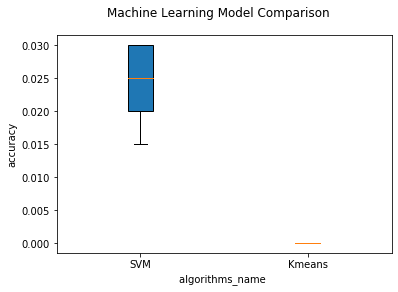

In [49]:
## comparison between two algorithms( k-means and SVM)
## Plotting boxplot to show average accuracy for both algorethms,
## average accuracy on the y axis and the model name on the x-axis
## dataSet_high
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome,   
                 vert=True,  # vertical box alignment
                 patch_artist=True, ) # fill with color)
ax.set_xticklabels(model_names)
plt.xlabel('algorithms_name ')
plt.ylabel('accuracy')
plt.show()

##[7]

              Figure 3
              comparison between two algorithms( k-means and SVM) using K-fold cross                       
              validation,
              on the yaxes the accuracy average obtained from K-fold validation, Xaxes algortihm name

In [30]:
## energy
outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high[:,0:6]))]


####implement 5 Folds on two algorithm (SVM, K-means)   
for model_name, model in models:
    k_fold_validation = KFold(n_splits=5, random_state=0)
    results = cross_val_score(model, dataSet_high[:,0:6], category, cv=5, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averaged accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    


SVM| averaged accuracy=0.026000 STD=0.005612
Kmeans| averaged accuracy=0.000000 STD=0.000000


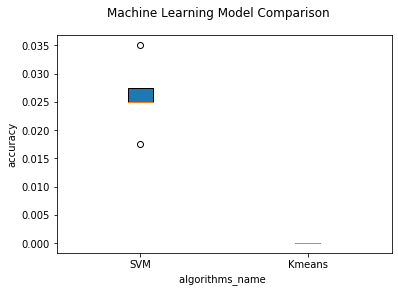

In [31]:
## comparison between two algorithms( k-means and SVM)
## Plotting boxplot to show average accuracy for both algorethms,
## average accuracy on the y axis and the model name on the x-axis
## energy
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome,   
                 vert=True,  # vertical box alignment
                 patch_artist=True, ) # fill with color)
ax.set_xticklabels(model_names)
plt.xlabel('algorithms_name ')
plt.ylabel('accuracy')
plt.show()


In [33]:
## pulse
outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high[:,6:12]))]


####implement 5 Folds on two algorithm (SVM, K-means)   
for model_name, model in models:
    k_fold_validation = KFold(n_splits=5, random_state=0)
    results = cross_val_score(model, dataSet_high[:,6:12], category, cv=5, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averaged accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    


SVM| averaged accuracy=0.021500 STD=0.004899
Kmeans| averaged accuracy=0.000000 STD=0.000000


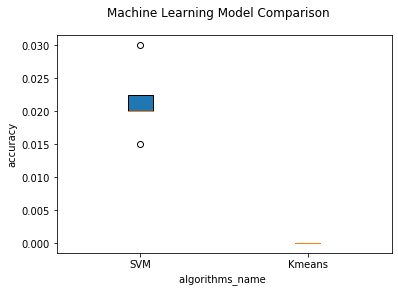

In [34]:
## comparison between two algorithms( k-means and SVM)
## Plotting boxplot to show average accuracy for both algorethms,
## average accuracy on the y axis and the model name on the x-axis
## pulse
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome,   
                 vert=True,  # vertical box alignment
                 patch_artist=True, ) # fill with color)
ax.set_xticklabels(model_names)
plt.xlabel('algorithms_name ')
plt.ylabel('accuracy')
plt.show()


In [35]:
## tone
outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high[:,12:18]))]


####implement 5 Folds on two algorithm (SVM, K-means)   
for model_name, model in models:
    k_fold_validation = KFold(n_splits=5, random_state=0)
    results = cross_val_score(model, dataSet_high[:,12:18], category, cv=5, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averaged accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    


SVM| averaged accuracy=0.024000 STD=0.005148
Kmeans| averaged accuracy=0.000000 STD=0.000000


In [36]:
## noise
outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high[:,18:24]))]


####implement 5 Folds on two algorithm (SVM, K-means)   
for model_name, model in models:
    k_fold_validation = KFold(n_splits=5, random_state=0)
    results = cross_val_score(model, dataSet_high[:,18:24], category, cv=5, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averaged accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    


SVM| averaged accuracy=0.023500 STD=0.006042
Kmeans| averaged accuracy=0.000000 STD=0.000000


In [55]:
## evaluate the second model using leave one out 
## dataSet_high
outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high))]

from sklearn.model_selection import LeaveOneOut 

for model_name, model in models:
    loo = LeaveOneOut()
    loo.get_n_splits(dataSet)
    results = cross_val_score(model, dataSet_high, category, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averaged accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    

##[8]

SVM| averaged accuracy=0.024000 STD=0.005831
Kmeans| averaged accuracy=0.000000 STD=0.000000


In [58]:
#evaluate StratifiedShuffleSplit validation method
## dataSet_high

from sklearn.model_selection import StratifiedShuffleSplit

outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high))]


for model_name, model in models:
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    sss.get_n_splits(dataSet, category)
    results = cross_val_score(model, dataSet_high, category, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averageed accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    
#[9]

SVM| averageed accuracy=0.024000 STD=0.005831
Kmeans| averageed accuracy=0.000000 STD=0.000000


In [65]:
## evaluate repeated kfolds model
## dataSet_high
from sklearn.model_selection import RepeatedKFold

outcome = []
model_names = []
models = [('SVM', SVC()), 
          ('Kmeans', KMeans(n_clusters=50).fit(dataSet_high))]


for model_name, model in models:
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
    results = cross_val_score(model, dataSet_high, category, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| averageed accuracy=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    
    
##[10]

SVM| averageed accuracy=0.024000 STD=0.005831
Kmeans| averageed accuracy=0.000000 STD=0.000000


# For all the cross validation technique that have been evaluated ,the accuracy is low and insufficient
Therfore, this features that I have built is not good, since it has deficient accuracy.
for both of Kmeans and SVM.

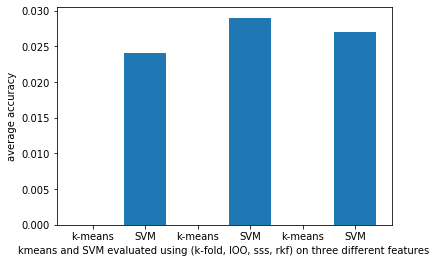

Figure 4
on the x-axis model names, validated using four cross validation technique as 
         (k-fold, lOO, sss, rkf)
         on the y-axis is the accuracy. it is clear that the accuracy for all
         the technique are almost similiar and insufficient.


In [67]:

## visualise the comparizon for  the four cross validation methods for SVM and Kmeans
# on different features (dataSet_high,low,mid)
#on the x-axis the clustering algorithm, on the y-axis is the average accuracy.
#it is clear that the accuracy for all the technique are almost the same and insufficient.

## visulaise the comparizon both Kmeans and SVM evaluated using four cross validation methods

# our data
height = [0,0.024,0, 0.029,0, 0.027, ]
bars = ('k-means','SVM', 'k-means','SVM','k-means', 'SVM',)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('kmeans and SVM evaluated using (k-fold, lOO, sss, rkf) on three different features')
plt.ylabel('average accuracy')
# Show graphic
plt.show()

print('Figure 4')
print('''on the x-axis model names, validated using four cross validation technique as 
         (k-fold, lOO, sss, rkf)
         on the y-axis is the accuracy. it is clear that the accuracy for all
         the technique are almost similiar and insufficient.''')
##[11]



# After trying to validate the features using cross validation.I'll try to test the model.

In [12]:
# create training and testing data by splitting it based on number of Folds 
# with zero random_state so the test data will be fold number 5

################################################################
#based on Pareto _principle, it's good to split the data as 80% for training ,
#so we fit the model on enough data to make it easy for predicting
#20% for validation set.or for test set.
#https://en.wikipedia.org/wiki/Pareto_principle
#####################################################################

#dataSet_high
X_train, X_test, y_train, y_test = train_test_split(dataSet_high, true_labels, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1600, 24) (1600,)
(400, 24) (400,)


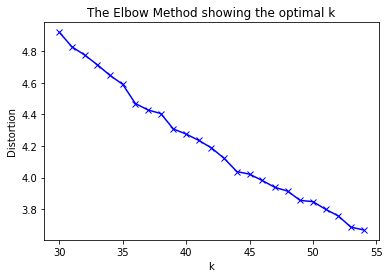

Figure 5
The elbow method is a heuristic method of interpretation and validation of 
         consistency within cluster analysis 
         designed to help find the appropriate number of clusters in a dataset.[13]


In [69]:
#since K means  is a method for unsupervised data, if we assume we don't know how many 
#classes we have, we can use this method to give us a hint for how many is the number 
# clusters 

# determine the optimum number of clusters using elbow method 

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# create new plot and data
plt.plot()
X = np.array(list(zip(X_train.ravel(),X_test.ravel())))
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(30,55)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print('Figure 5')
print('''The elbow method is a heuristic method of interpretation and validation of 
         consistency within cluster analysis 
         designed to help find the appropriate number of clusters in a dataset.[13]''')
##### This plot elbow in most cases is a good indication,but using this features 
#####  it's not clear which is the optimum K,since the knie is not clear here
#####When K increases, the centroids are closer to the clusters centroids.
#####The improvements will decline, at some point rapidly, creating the elbow shape.
#### That point is the optimal value for K. In the image below ,
##### the appropriate number of clusters in our case is not determined 
##[12]
##[13] https://en.wikipedia.org/wiki/Elbow_method_(clustering)]

apply Kmeans cluster for different k.

to observe the behaviour of our model we can either alter the features , the cluster (k) numbers.or the K-means parameters:‘k-means++’, ‘random’ or n_init, 
and also number of clusters 


## Trying to see the impact on accuracy during changing the cluster numbers(k)

Figure 6
The figure shows that the accuracy fluctuated during varying the cluster numbers 
      and it's not robust,every time when running the cell return different accuracy 
      related to cluster number


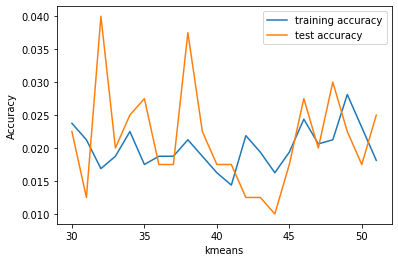

In [71]:
    
# evaluate n_clusters from 30 to 52 ,it should be that while increasing cluster number,
#the accuracy should increase


training_accuracy =[]
test_accuracy=[]
n_clusters= range(30,52)
for i in n_clusters:
    kmeans = KMeans( n_clusters = i ,init='k-means++', n_init=10, max_iter=100).fit(X_train)
    labels = kmeans.labels_
    centers=kmeans.cluster_centers_
    labelsPre =kmeans.predict(X_test)
    
# record training set accuracy
    training_accuracy.append(accuracy_score(y_train, labels))
    # record test set accuracy
    test_accuracy.append(accuracy_score(y_test, labelsPre))
    
    
plt.plot(n_clusters, training_accuracy, label="training accuracy")
plt.plot(n_clusters, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("kmeans")
plt.legend()
plt.savefig('kmenas_compare_model')

print('Figure 6')
print('''The figure shows that the accuracy fluctuated during varying the cluster numbers 
      and it's not robust,every time when running the cell return different accuracy 
      related to cluster number''')
   
##[14]

In [ ]:
#############################################3
# It's clear that the training accuracy deficient 
# and also the test set.
#for the fitted data in algorithm K-means 
################################################

This table is an interpretation of the above figure, number of clusters are randomely picked 


Training accuracy

| parameters         | Accuracy score |
| :----------------- | :------------- |
| K-means clustering |                |
| K=32               | 0\.018         |
| K=35               | 0\.017         |
| K=40               | 0\.015         |
| k=45               | 0\.022         |
| k=50               | 0\.023         |



Test accuracy

| parameters         | Accuracy score |
| :----------------- | :------------- |
| K-means clustering |                |
| K=32               | 0\.013         |
| K=35               | 0\.027         |
| K=40               | 0\.017         |
| k=45               | 0\.022         |
| k=50               | 0\.020         |

It can be seen that the accuracy not as we expected to be. during increasing the cluster number the accuracy should increase, unfortunately the accuracy is still low for both training and test sets

In [13]:
### try to make feature selection by testing features separately
## energy features
kmeans = KMeans(n_clusters = 48 ,init='k-means++', n_init=10, max_iter=300).fit(X_train[:,0:6])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,0:6])
labelsPre_train =kmeans.predict(X_train[:,0:6])
#print(labels)
#print(labelsPre)

# the accuracy for the true labels vs predicted labels
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
print('Accuracy of k-means classifier on train set: {:.2f}'.format(accuracy_score(y_train, labelsPre_train)))

Accuracy of k-means classifier on test set: 0.01
Accuracy of k-means classifier on train set: 0.02


Figure 7
Visualization of the centers of the data with the center that calculated by k-means 
                    algorithm, in 3D


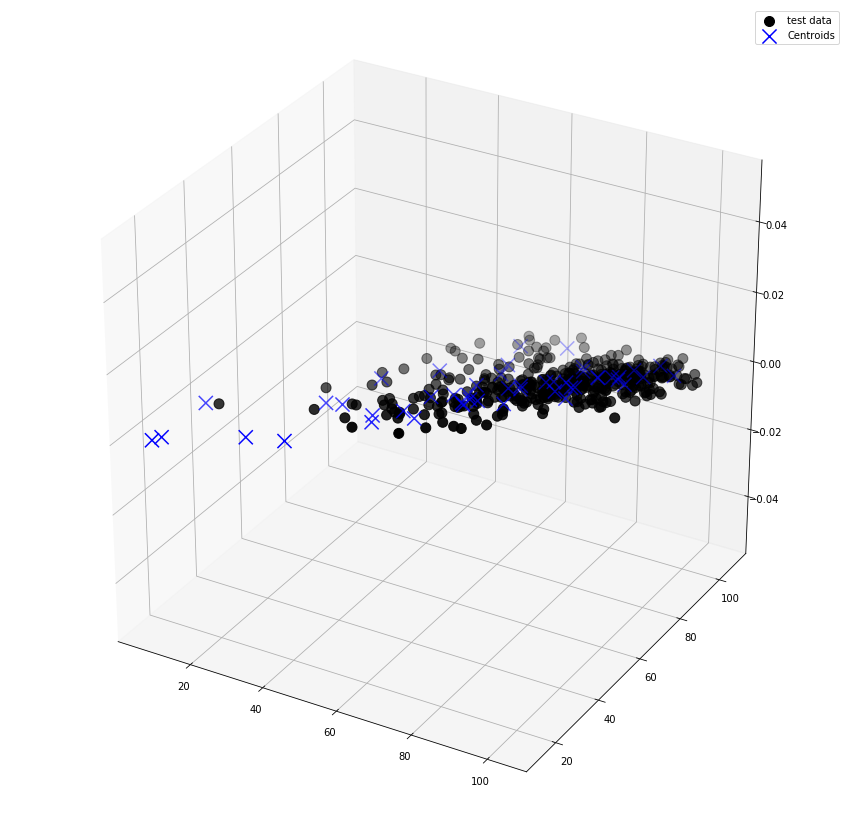

In [11]:
#### visualize k-means output in 3D 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:,0],X_test[:,1], s = 100, c = 'black',label = 'test data')
#Plotting the centroids of the clusters
ax.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

ax.legend()

print('Figure 7')
print('''Visualization of the centers of the data with the center that calculated by k-means 
                    algorithm, in 3D''')
##[15]

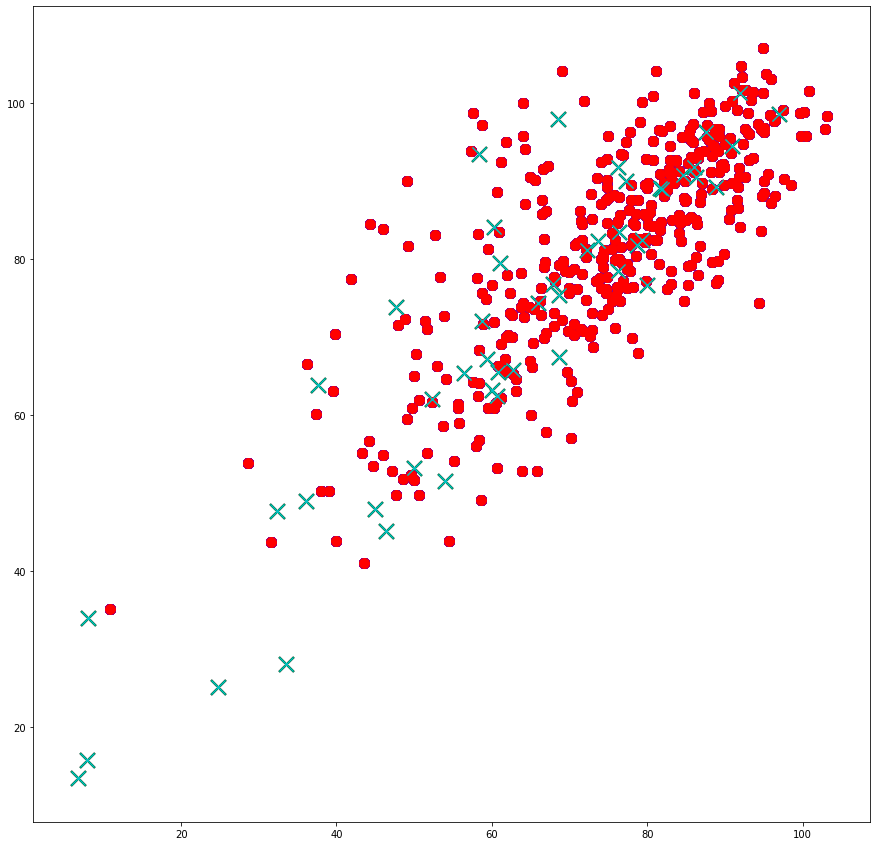

Figure 8
plot between the data centers and the centers calculated by kmeans algorithm in 2D 


In [14]:
##visualize  the  k-means output in 2D  without labels

fig = plt.figure(figsize=(15,15))

from itertools import cycle
cycol = cycle('bgrcmk')

#Visualising the clusters
for k in range(50):
    plt.scatter(X_test[:,0],X_test[:,1], s = 100,  c=next(cycol))
    #Plotting the centroids of the clusters
    plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200,c=next(cycol))
plt.show()

print('Figure 8')
print('plot between the data centers and the centers calculated by kmeans algorithm in 2D ')
##[16]

Visualization of the centers of the data with the center that calculated by k-means 
                    algorithm, with labels for the test data


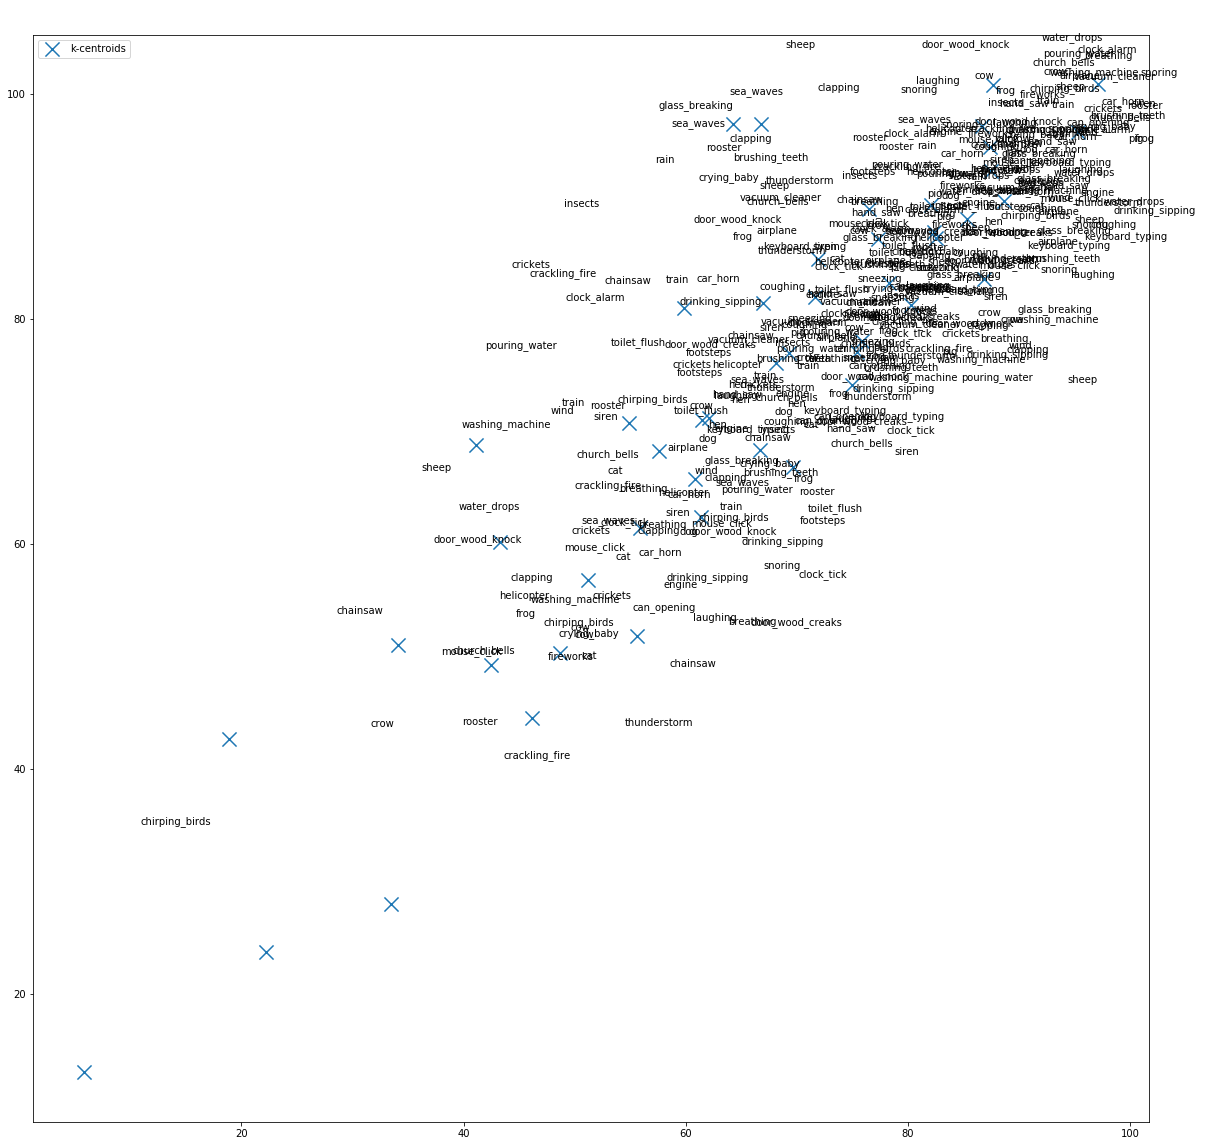

In [77]:
## visualize the output with labels 
fig = plt.figure(figsize=(20,20))
for i, txt in enumerate(category[1600:2000]):
    plt.annotate(txt, (X_test[i,0], X_test[i,1]))
    #Plotting the centroids of the clusters

plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200,label='k-centroids')
plt.legend(loc='upper left')

print('''Visualization of the centers of the data with the center that calculated by k-means 
                    algorithm, with labels for the test data''')
##[17]

# From all the above figures It can be seen that energy feture failed in making clustering



/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.0000    0.0000    0.0000         8
           2     0.0000    0.0000    0.0000        10
           3     0.0000    0.0000    0.0000         8
           4     0.0000    0.0000    0.0000        10
           5     0.0000    0.0000    0.0000         7
           6     0.0000    0.0000    0.0000         5
           7     0.0000    0.0000    0.0000        10
           8     0.0000    0.0000    0.0000         9
           9     0.0000    0.0000    0.0000        12
          10     0.0909    0.1250    0.1053         8
          11     0.0000    0.0000    0.0000         7
          12     0.0588    0.0769    0.0667        13
          13     0.0435    0.1111    0.0625         9
          14     0.0000    0.0000    0.0000         7
          15     0.0000    0.0000    0.0000         9
          16     0.0000    0.0000    0.0000        10
          17     0.0000    

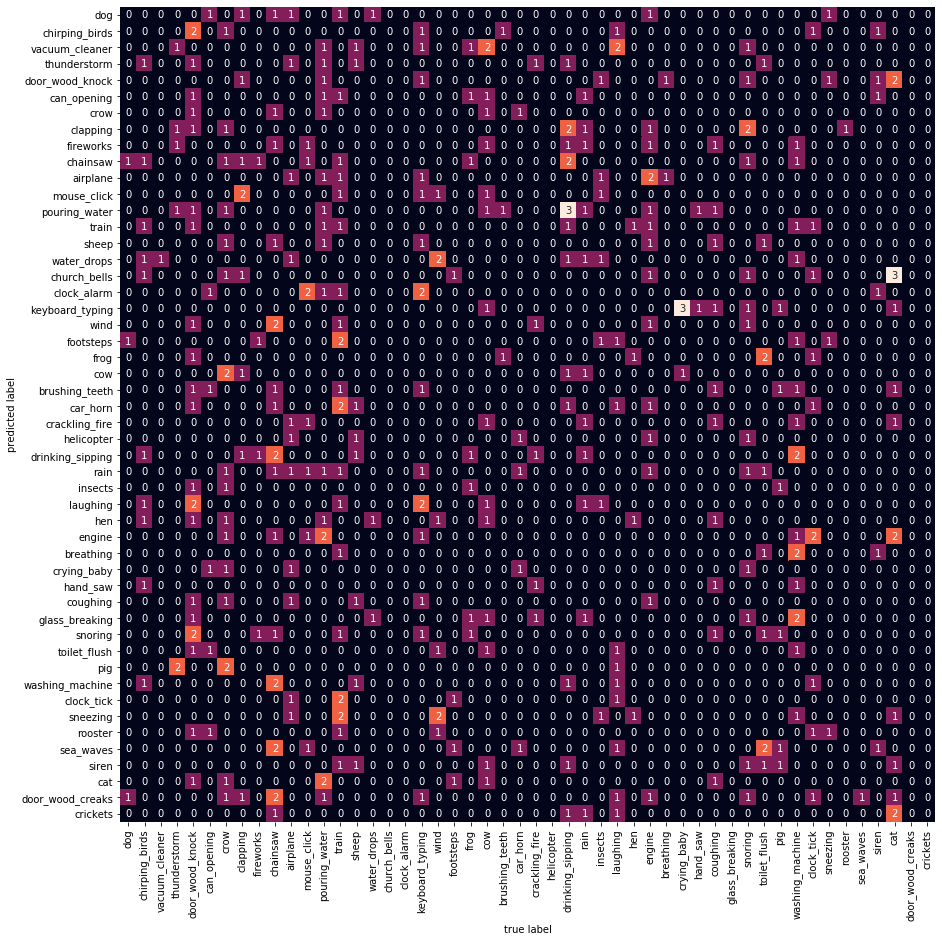

In [14]:
### evaluate the kmeans using classification report 
### since it isn't applicable to make ROC ,because it is suitable for binarize data.
###but our data is multiclass
### we can have the accuracy using classification report 
from sklearn.metrics import classification_report,accuracy_score

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=labelsPre )
print(sk_report)

print(accuracy_score(labelsPre, y_test))

import seaborn as sns

### the confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test)
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Category,
            yticklabels=Category
           )

plt.xlabel('true label')
plt.ylabel('predicted label');

##[18]


# The top and buttom row is cut to the half, This was a matplotlib regression introduced in 3.1.1 which has been fixed in 3.1.2 . 
and the matplot lib version was 3.1.1

In [15]:
## continue varying the features 
##  pulse
kmeans = KMeans(n_clusters = 48 ,init='k-means++', n_init=10, max_iter=300).fit(X_train[:,6:12])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,6:12])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.02


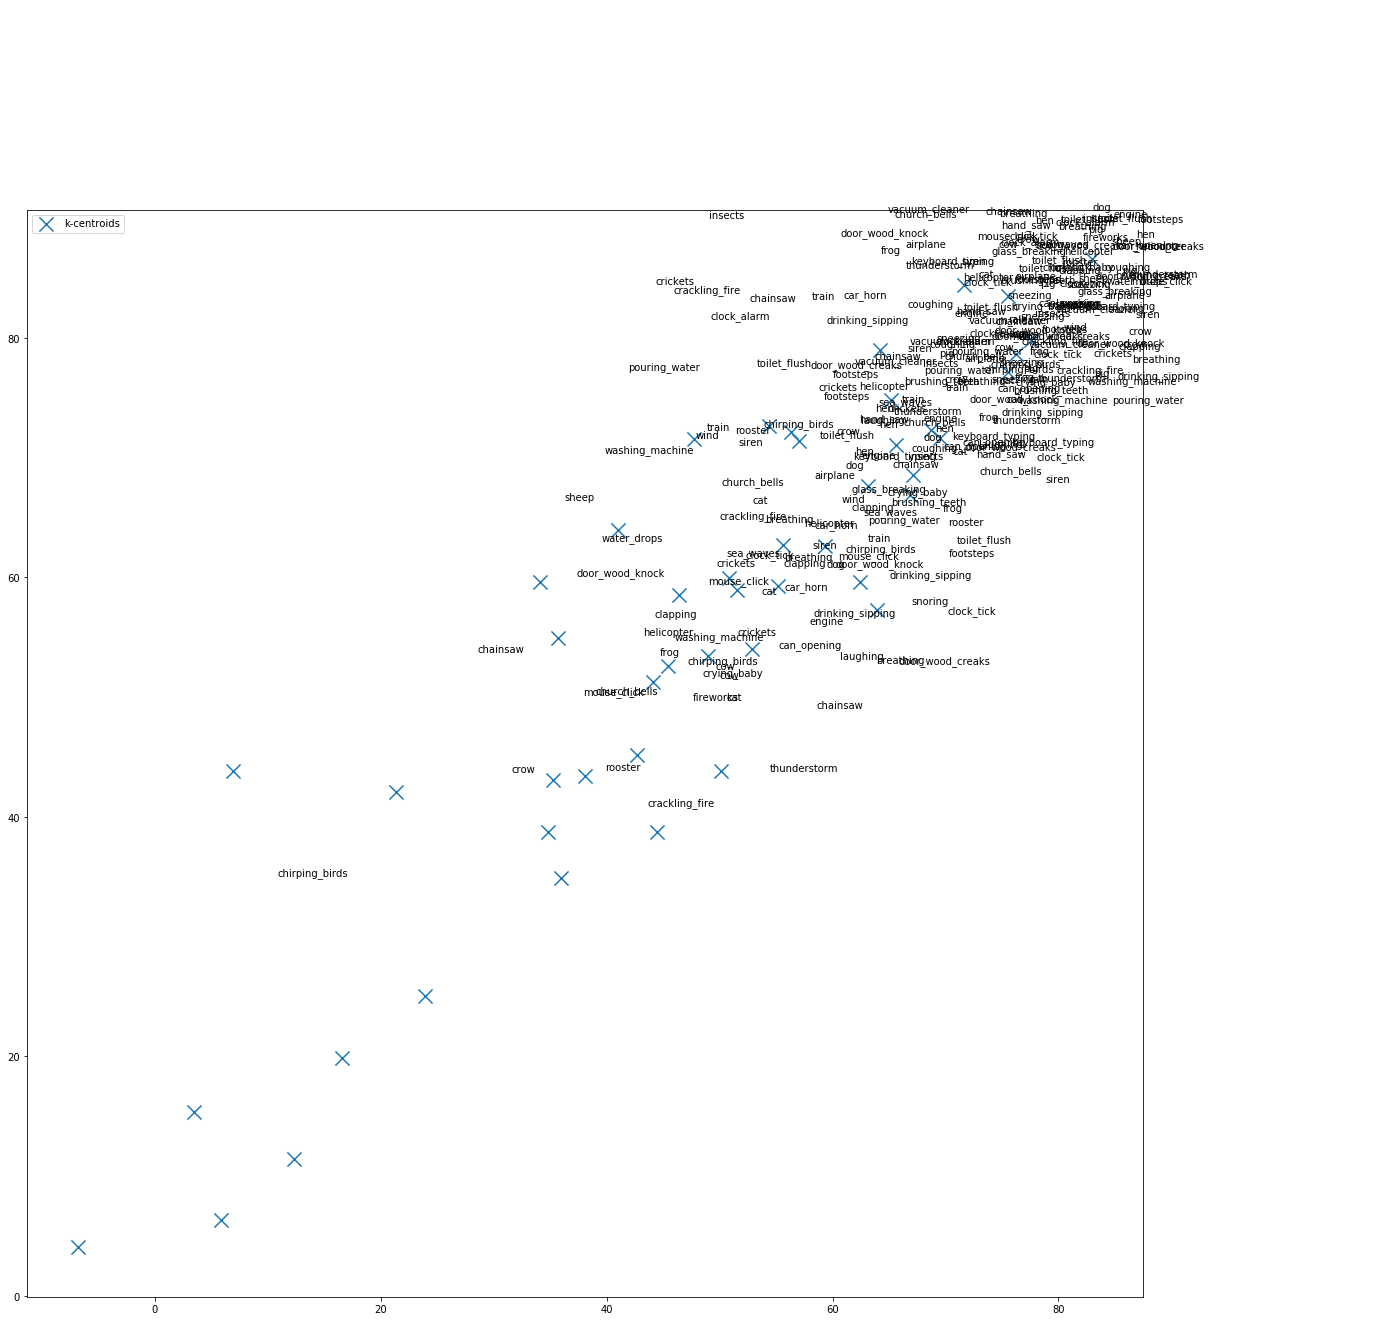

In [81]:
## visualize the output with labels 
fig = plt.figure(figsize=(20,20))
for i, txt in enumerate(category[1600:2000]):
    plt.annotate(txt, (X_test[i,0], X_test[i,1]))
    #Plotting the centroids of the clusters

plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200,label='k-centroids')
plt.legend(loc='upper left')


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.0556    0.1250    0.0769         8
           2     0.3333    0.2000    0.2500        10
           3     0.0000    0.0000    0.0000         8
           4     0.1250    0.1000    0.1111        10
           5     0.0000    0.0000    0.0000         7
           6     0.0000    0.0000    0.0000         5
           7     0.0000    0.0000    0.0000        10
           8     0.0000    0.0000    0.0000         9
           9     0.0000    0.0000    0.0000        12
          10     0.0000    0.0000    0.0000         8
          11     0.0000    0.0000    0.0000         7
          12     0.0000    0.0000    0.0000        13
          13     0.0000    0.0000    0.0000         9
          14     0.0000    0.0000    0.0000         7
          15     0.0000    0.0000    0.0000         9
          16     0.0000    0.0000    0.0000        10
          17     0.0000    

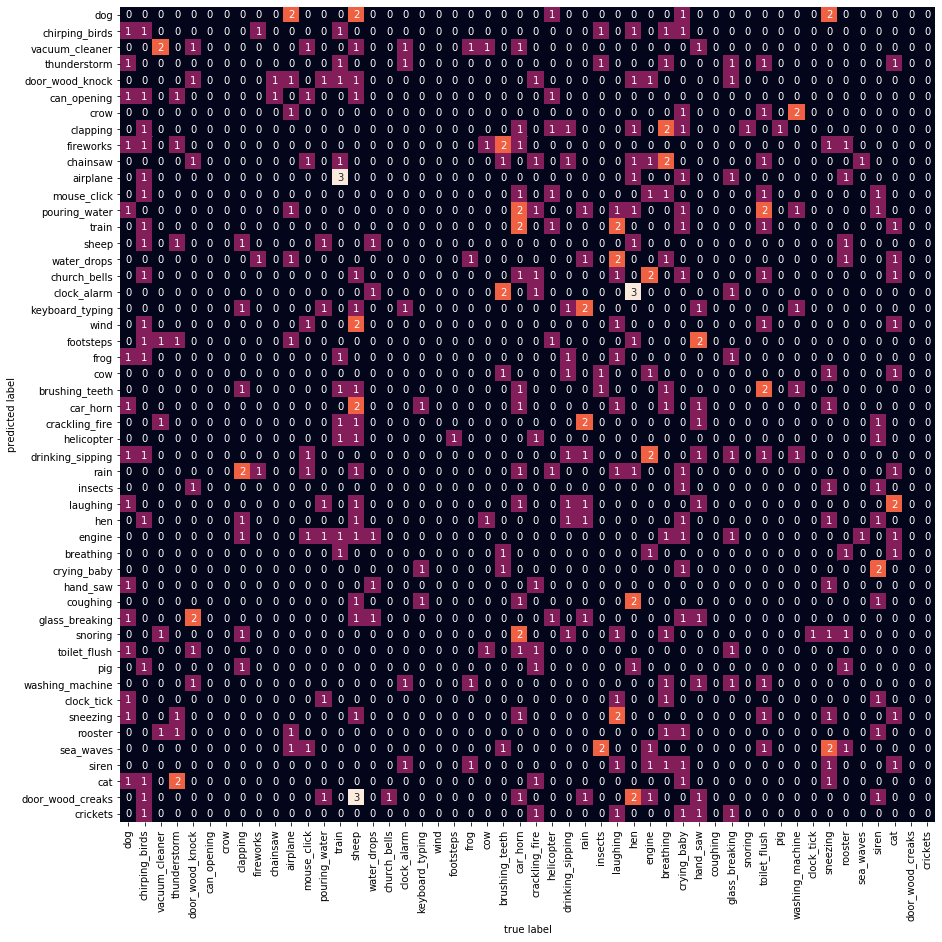

In [16]:
### evaluate the kmeans using classificatiom report 
from sklearn.metrics import classification_report,accuracy_score

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=labelsPre )
print(sk_report)

print(accuracy_score(labelsPre, y_test))

import seaborn as sns

### the confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test)
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Category,
            yticklabels=Category
           )
plt.xlabel('true label')
plt.ylabel('predicted label');




In [17]:

##  tone
kmeans = KMeans(n_clusters = 48 ,init='k-means++', n_init=10, max_iter=300).fit(X_train[:,12:18])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,12:18])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.02


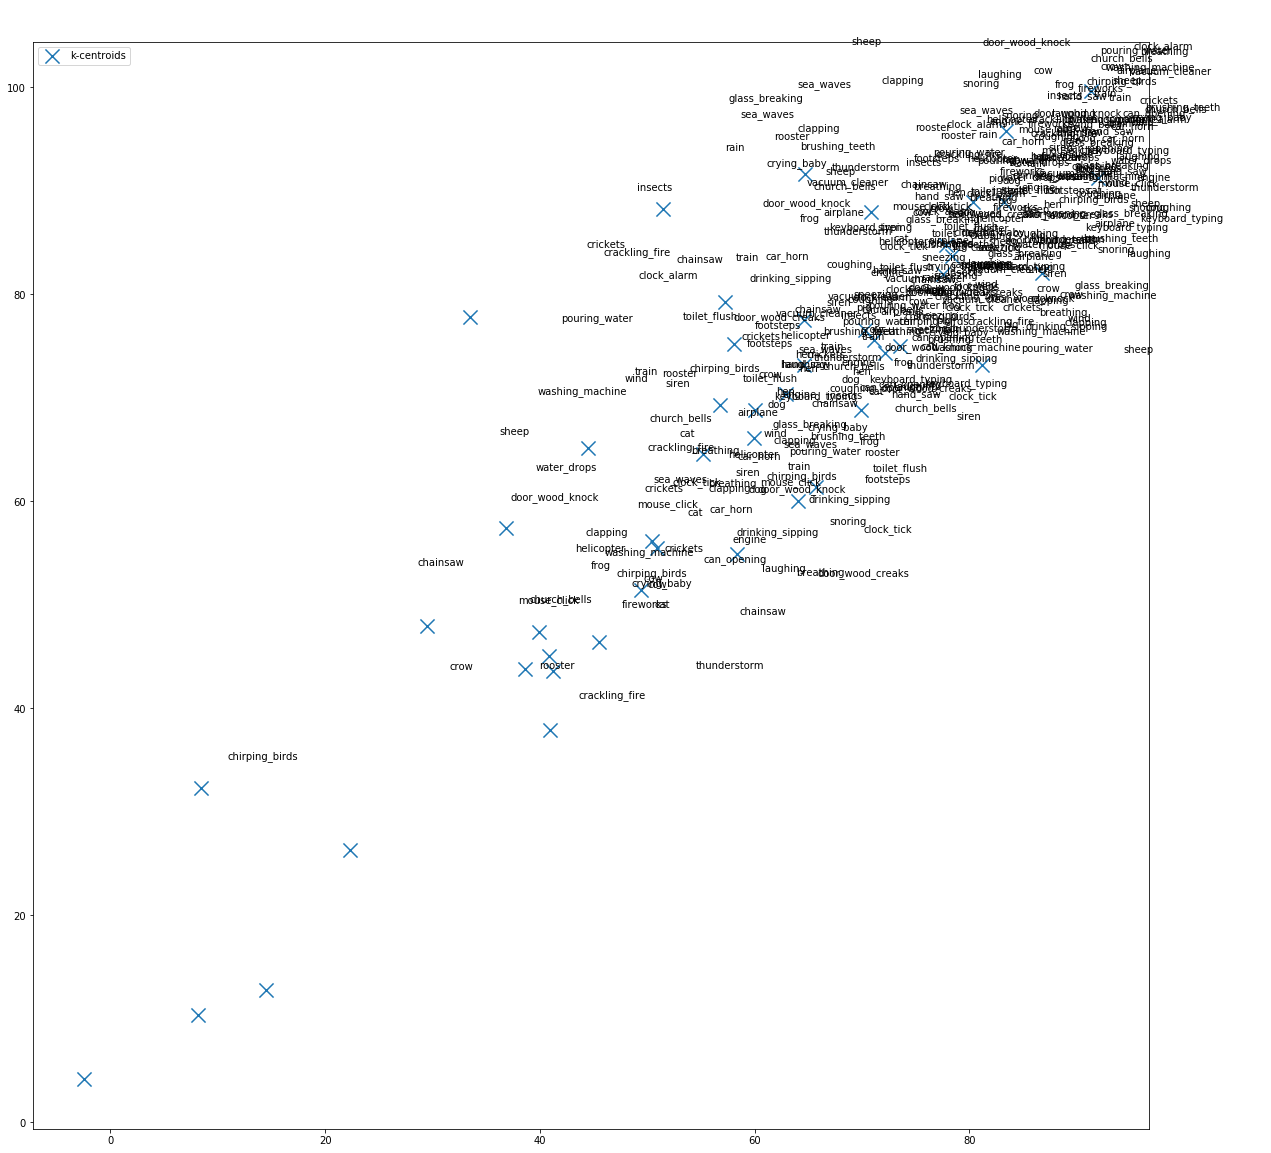

In [18]:
## visualize the output with labels 
fig = plt.figure(figsize=(20,20))
for i, txt in enumerate(category[1600:2000]):
    plt.annotate(txt, (X_test[i,0], X_test[i,1]))
    #Plotting the centroids of the clusters

plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200,label='k-centroids')
plt.legend(loc='upper left')


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.0000    0.0000    0.0000         8
           2     0.0000    0.0000    0.0000        10
           3     0.0000    0.0000    0.0000         8
           4     0.0000    0.0000    0.0000        10
           5     0.0714    0.1429    0.0952         7
           6     0.0000    0.0000    0.0000         5
           7     0.0000    0.0000    0.0000        10
           8     0.0000    0.0000    0.0000         9
           9     0.0000    0.0000    0.0000        12
          10     0.0000    0.0000    0.0000         8
          11     0.2222    0.2857    0.2500         7
          12     0.1000    0.0769    0.0870        13
          13     0.0000    0.0000    0.0000         9
          14     0.0000    0.0000    0.0000         7
          15     0.0000    0.0000    0.0000         9
          16     0.0000    0.0000    0.0000        10
          17     0.0000    

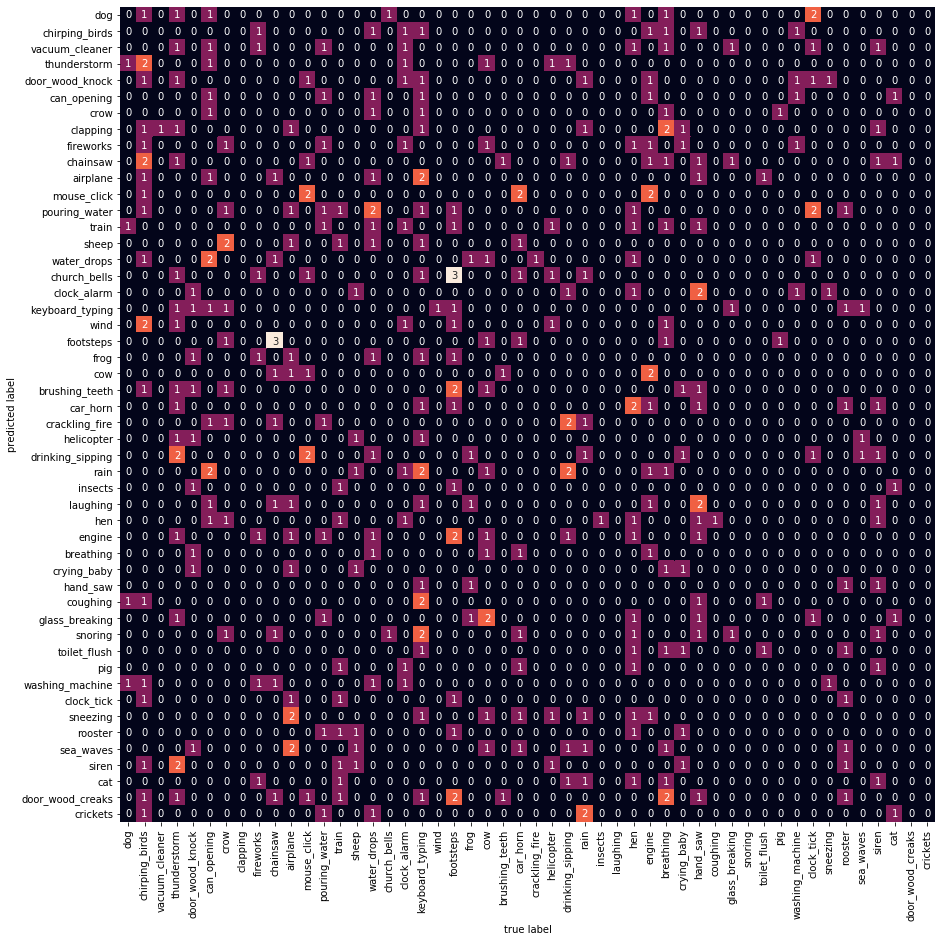

In [19]:
### evaluate the kmeans using classificatiom report 
from sklearn.metrics import classification_report,accuracy_score

sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=labelsPre )
print(sk_report)

print(accuracy_score(labelsPre, y_test))

import seaborn as sns

### the confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test)
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Category,
            yticklabels=Category
           )

plt.xlabel('true label')
plt.ylabel('predicted label');



In [86]:

## noise
kmeans = KMeans(n_clusters = 48 ,init='k-means++', n_init=10, max_iter=300).fit(X_train[:,18:24])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,18:24])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.03


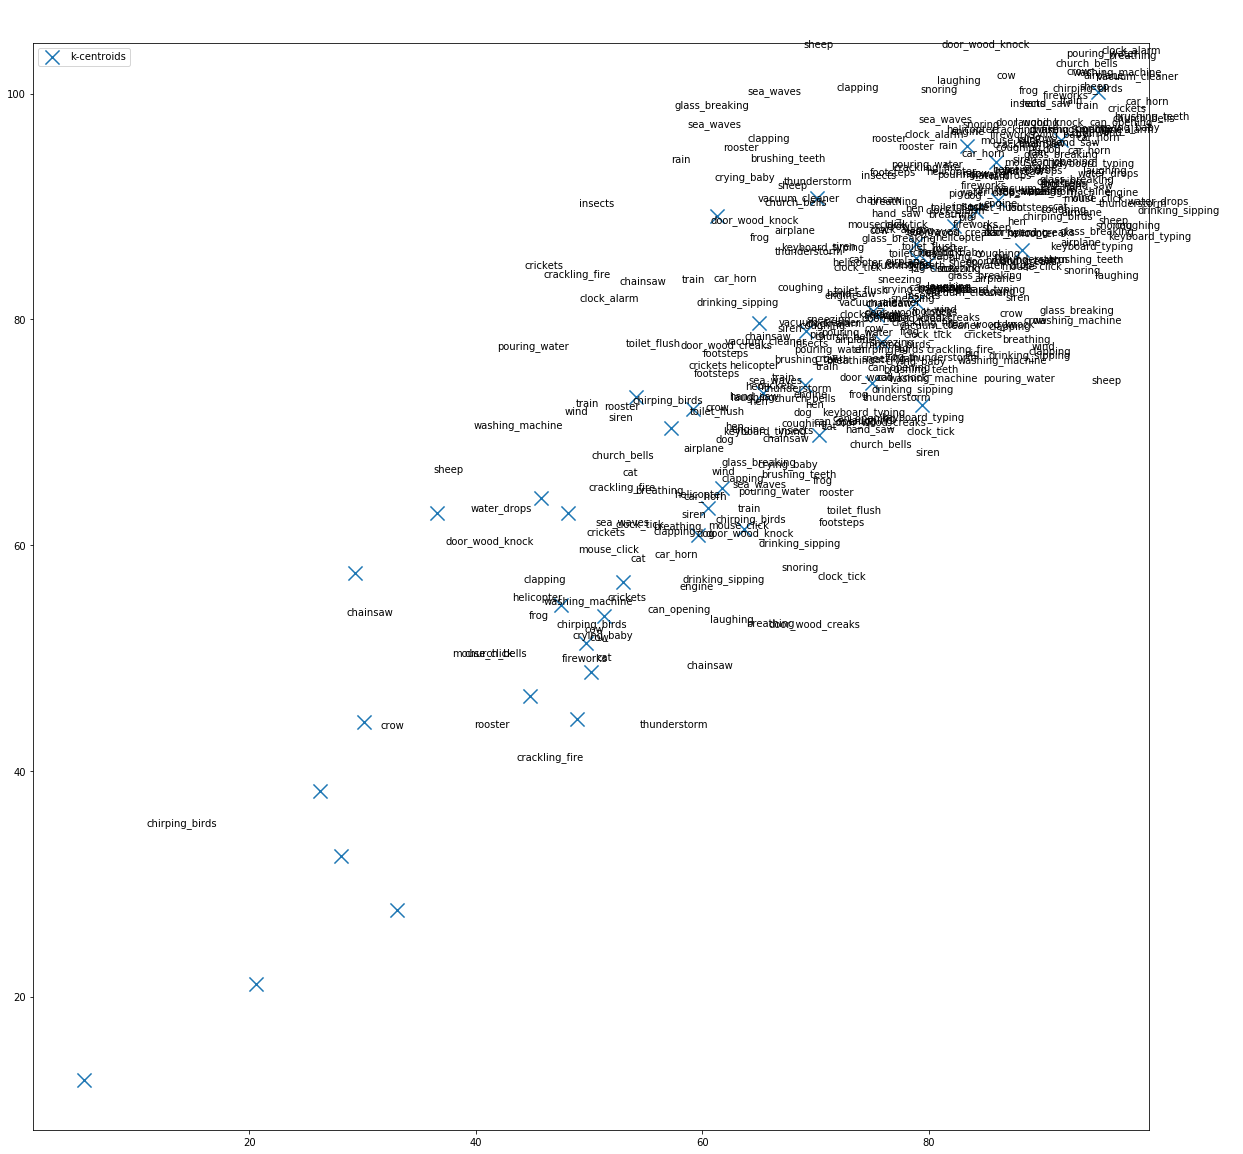

In [87]:
## visualize the output with labels 
fig = plt.figure(figsize=(20,20))
for i, txt in enumerate(category[1600:2000]):
    plt.annotate(txt, (X_test[i,0], X_test[i,1]))
    #Plotting the centroids of the clusters

plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200,label='k-centroids')
plt.legend(loc='upper left')


In [88]:
##  varying the init for kmean to random ,energy 
kmeans = KMeans(n_clusters = 48 ,init='random', n_init=10, max_iter=300).fit(X_train[:,0:6])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,0:6])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.03


In [89]:
##  varying the init for kmean to random ,pulse
kmeans = KMeans(n_clusters = 48 ,init='random', n_init=10, max_iter=300).fit(X_train[:,6:12])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,6:12])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.02


In [90]:
##  varying the init for kmean to random ,tone
kmeans = KMeans(n_clusters = 48 ,init='random', n_init=10, max_iter=300).fit(X_train[:,12:18])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,12:18])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.01


In [91]:
##  varying the init for kmean to random ,noise
kmeans = KMeans(n_clusters = 48 ,init='random', n_init=10, max_iter=300).fit(X_train[:,18:24])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,18:24])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.03


In [95]:
##  varying the n_init ,max_iter for energy
kmeans = KMeans(n_clusters = 48 ,init='k-means++', n_init=15, max_iter=300).fit(X_train[:,0:6])
labels = kmeans.labels_
centers=kmeans.cluster_centers_
labelsPre =kmeans.predict(X_test[:,0:6])

#print(labels)
#print(labelsPre)

# the accuracy for the fir
print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(labelsPre, y_test)))
#print('Accuracy of k-means classifier on test set: {:.2f}'.format(accuracy_score(y_test[:50,0:2], labelsPre)))

Accuracy of k-means classifier on test set: 0.02


Table[1] shows the accuracy obtained while varying the parameter of the k-means model
on dataSet_high



| parameters                 | Accuracy score |
| :------------------------- | :------------- |
| K-means clustering         |                |
| Energy feature, k\_means++ | 0\.02          |
| Pulse  feature, k\_means++ | 0\.02          |
| Tone  feature, k\_means++  | 0\.01          |
| Noise  feature, k\_means++ | 0\.03          |
|                            |                |
| Energy  feature, random    | 0\.03          |
| Pulse , random             | 0\.02          |
| Tone feature, random       | 0\.01          |
| Noise feature, random      | 0\.03          |


Table[2] 

| parameters                                | Accuracy score |
| :---------------------------------------- | :------------- |
| K-means clustering for energy             |                |
| K=48,init=k-means ,max\_iter=200,ninit=25 | 0\.01          |
| K=48,init=k-means,max\_iter=100,n-init=10 | 0\.04          |
| K=48,init=k-means,max\_iter=300,ninit=15  | 0\.02          |
| K=48,init=random,max\_iter=300,ninit=20   | 0\.01          |
| K=48,init=random,max\_iter=100,n-init=10  | 0\.04          |
| K=48,init=random,max\_iter=200,ninit=25   | 0\.03          |
|                                           |                |
|                                           |                |

it can be seen that varying the parameters of the algorithm has no effect, and the changes in the accuracy can't be mentioned

# From all the above Figures and tables and confusion matrices, it is obvious that the accuracy is deficient, even by varying the features, and the parameters of the algorithm. Therefor it's not possible to build the model by using these features. Furthermore all the features faild to make good model for clustering.


## Testing only two features using SVM 

In [20]:
#### I will try with the first two features of pulse features


from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(dataSet_high[:,0:2], true_labels, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1600, 2) (1600,)
(400, 2) (400,)


In [8]:
clf = SVC(kernel='linear', C=1,gamma=2,degree=1)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)
score = clf.score(X_test,y_test)
print('LinearSVC score %s' % score)

LinearSVC score 0.0275


In [10]:
clf = SVC(kernel='poly', C=1,gamma=2,degree=1)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)
score = clf.score(X_test,y_test)
print('polySVC score %s' % score)


polySVC score 0.0275


In [21]:
clf = SVC(kernel='rbf', C=1,gamma=2,degree=1)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)
score = clf.score(X_test,y_test)
print('rbfSVC score %s' % score)


rbfSVC score 0.0325


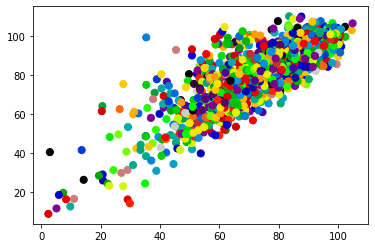

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=true_labels[0:1600],cmap=plt.cm.nipy_spectral ,s=50);

In [12]:
#### just to see if there any match between the predected and the real labels.
#### there are no matches 
i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue

17 = 24
5 = 29
8 = 24
47 = 29
18 = 24
4 = 29
39 = 29
47 = 24
22 = 29
48 = 35
46 = 29
37 = 45
18 = 11
14 = 24
22 = 29
28 = 24
9 = 35
30 = 29
23 = 24
33 = 29
31 = 29
7 = 26
7 = 45
4 = 24
11 = 29
24 = 24
0 = 29
43 = 17
30 = 24
34 = 29
16 = 35
6 = 24
6 = 26
46 = 45
12 = 24
37 = 24
32 = 45
18 = 24
48 = 29
20 = 17
17 = 24
45 = 42
26 = 11
48 = 29
18 = 24
45 = 25
13 = 35
3 = 29
44 = 29
22 = 35
15 = 29
45 = 24
23 = 35
31 = 45
18 = 26
8 = 24
39 = 17
24 = 35
17 = 17
3 = 24
9 = 29
13 = 37
48 = 24
27 = 45
48 = 24
47 = 24
16 = 24
18 = 29
8 = 26
17 = 24
10 = 29
19 = 24
16 = 24
12 = 17
37 = 37
42 = 35
2 = 29
38 = 24
0 = 24
8 = 5
27 = 17
10 = 24
9 = 17
42 = 45
40 = 29
24 = 29
20 = 29
24 = 35
48 = 24
17 = 29
43 = 45
3 = 37
11 = 24
30 = 24
2 = 29
0 = 29
25 = 29
4 = 45
39 = 26
47 = 29


              precision    recall  f1-score   support

           0     0.1111    0.1250    0.1176         8
           1     0.1000    0.1250    0.1111         8
           2     0.2500    0.1000    0.1429        10
           3     0.0000    0.0000    0.0000         8
           4     0.0000    0.0000    0.0000        10
           5     0.0000    0.0000    0.0000         7
           6     0.1538    0.4000    0.2222         5
           7     0.0000    0.0000    0.0000        10
           8     0.0000    0.0000    0.0000         9
           9     0.0000    0.0000    0.0000        12
          10     0.0000    0.0000    0.0000         8
          11     0.0000    0.0000    0.0000         7
          12     0.0000    0.0000    0.0000        13
          13     0.0000    0.0000    0.0000         9
          14     0.0000    0.0000    0.0000         7
          15     0.2000    0.1111    0.1429         9
          16     0.0000    0.0000    0.0000        10
          17     0.0000    

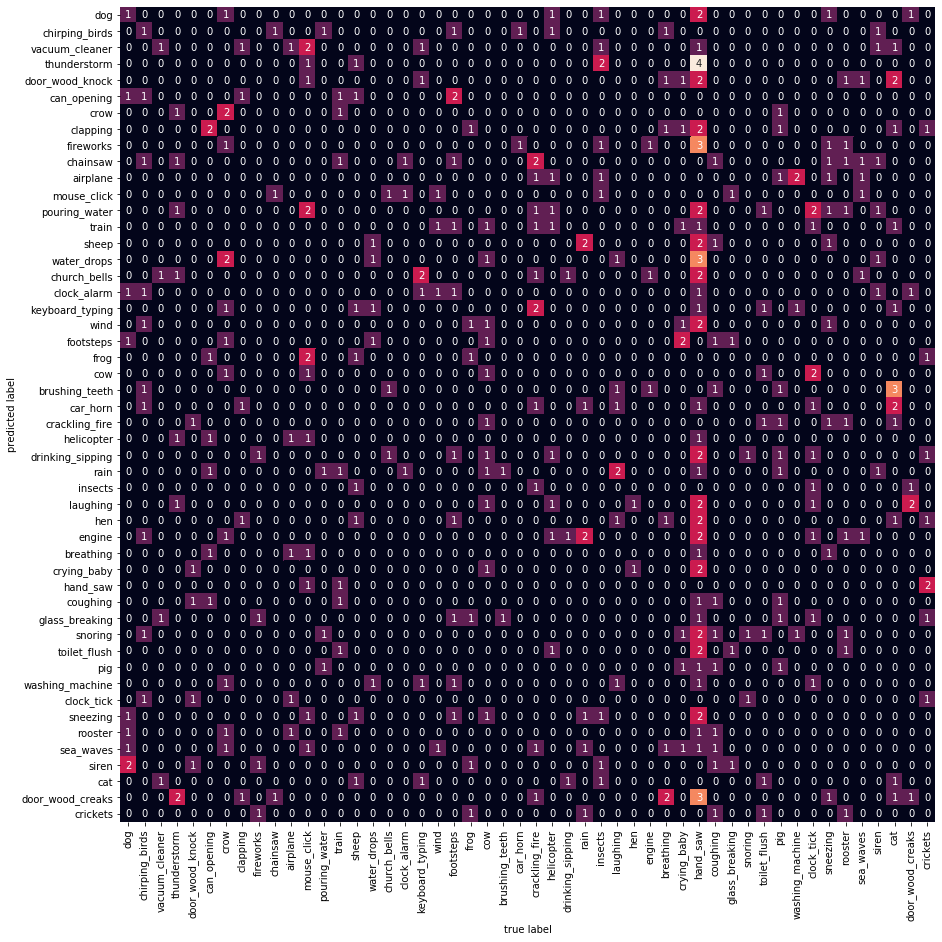

In [22]:
## evaluate the above cell,for the last attempt 
# the training set is the first 1600, and the test set is the last 400 ,80% training and 20% for test 
### evaluate the kmeans using classificatiom report 
from sklearn.metrics import classification_report,accuracy_score
sk_report = classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=classifier_pred )
print(sk_report)

print(accuracy_score(classifier_pred, y_test))

import seaborn as sns

### the confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(classifier_pred, y_test)
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Category,
            yticklabels=Category
           )

plt.xlabel('true label')
plt.ylabel('predicted label');



In [15]:
##### changing the parameters of the algorithms 
lf = SVC(kernel='rbf', C=50,gamma=20,degree=3)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)
score = clf.score(X_test,y_test)
print('rbfSVC score %s' % score)


rbfSVC score 0.0275


Table[3] shows the accuracy for every model based on varying the parameters (linear,rbf,poly, and the other parameters such as:C, gamma, degree)

| parameters                             | Average Accuracy score |
| :------------------------------------- | :--------------------- |
| SVM clustering                         |                        |
| kernel(linear)                         | 0\.0275                |
| kernel(poly)                           | 0\.0275                |
| kernel(rbf)                            | 0\.0325                |
| kernel(rbf)(c=1000, gamma=20,degree=3) | 0\.0205                |
| kernel(rbf)(c=100, gamma=10,degree=7)  | 0\.0195                |
| kernel(rbf)(c=50, gamma=30,degree=8)   | 0\.0275                |
|                                        |                        |

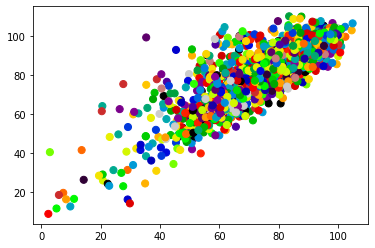

In [30]:
"""def plot_svc_decision_function(model, ax=None, plot_support=True):
    Plot the decision function for a 2D SVC
    X = X_train[:,6:8]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
    y = y_train

    h = .02  # step size in the mesh
    
    # create grid to evaluate model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    Y, X = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train[:,6:8], y_train)"""
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50,cmap=plt.cm.nipy_spectral)
#plot_svc_decision_function(rbf_svc);

#[https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html] +
#[https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html]
# this code is fitted from two example codes.

# I tried visualizing the SVM with the decision boundary, but while running the code it return me Memory error. and while I searched for solution, I found that('A memory error means that your program has ran out of memory. This means that your program somehow creates too many objects') and from the plot above In my point of view it's not easy to fit a line that seperate the data.


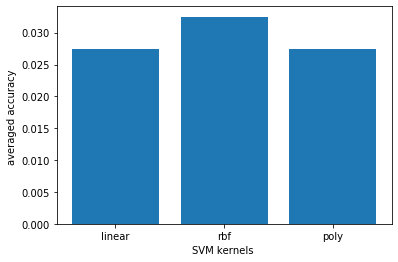

In [16]:

## visualise the comparizon on SVM for different kernel on dataSet_high[:,0:2]

# our data
height = [0.0275, 0.0325, 0.0275, ]## AVERAGED ACCUARACY 
bars = ('linear', 'rbf', 'poly')# different kernels 
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('SVM kernels ')
plt.ylabel('averaged accuracy ')
# Show graphic
plt.show()

# the result is that there are no effect of varying the kernel on this features.

applying hierarichal kolomogrov clustering, with different type of linkage(complete linkage,single linkage,average linkage) for the whole dataSet

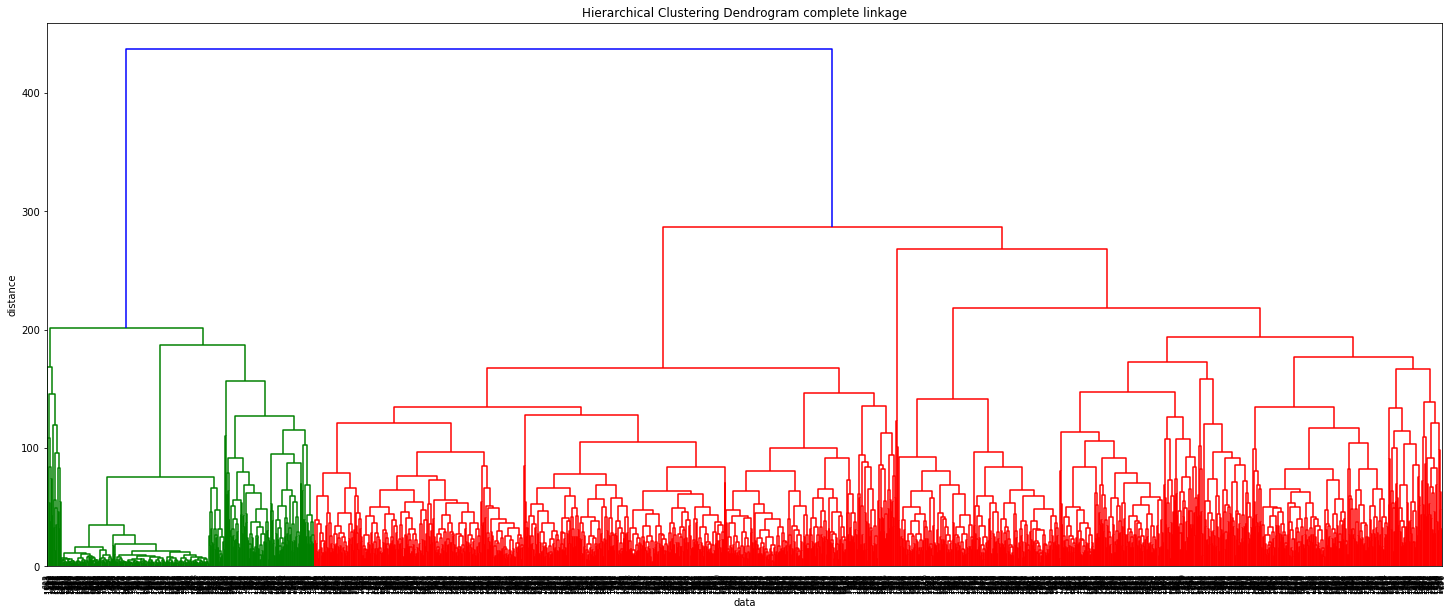

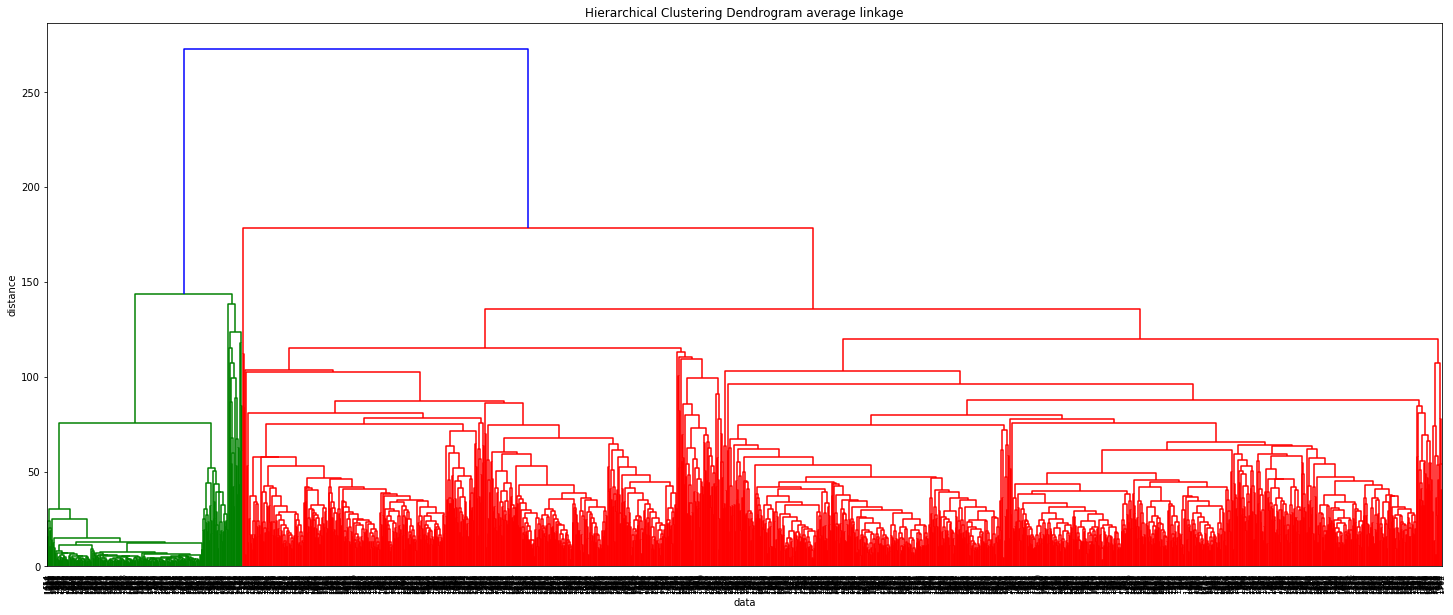

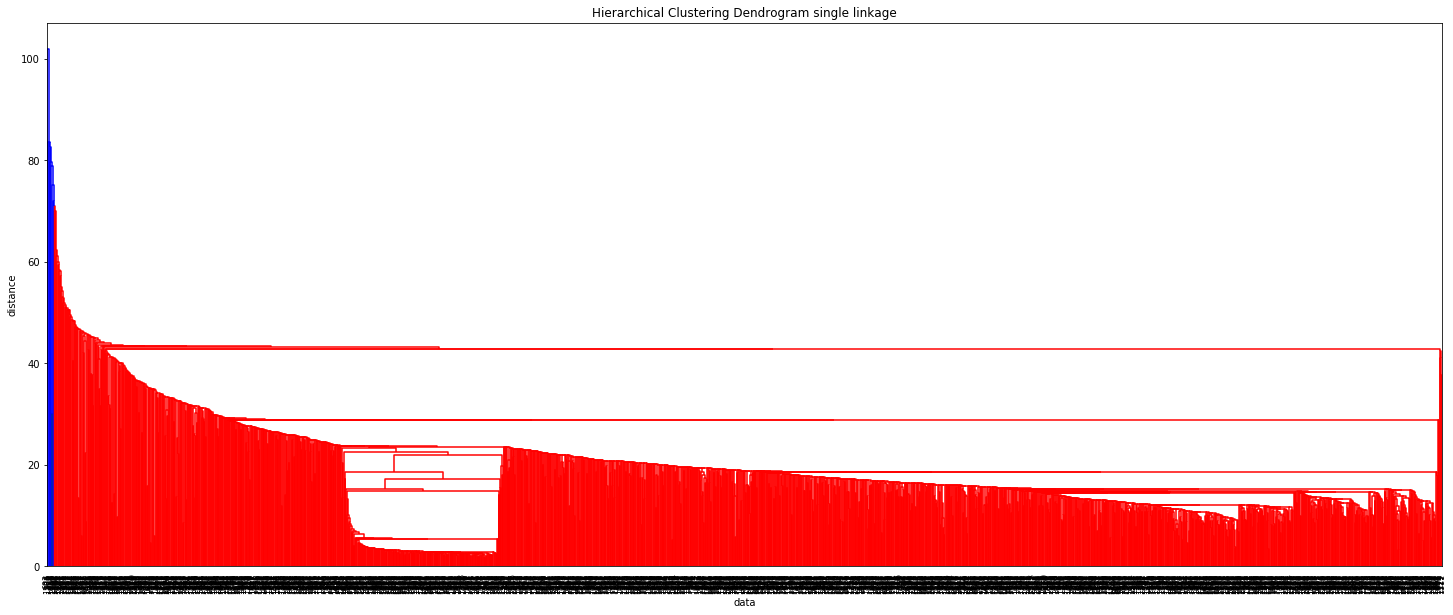

In [38]:
### apply hierarichal kolomogrov clustering on the whole dataSet
from scipy.cluster.hierarchy import linkage, dendrogram


hc_complete = linkage((dataSet_high), "complete")
hc_average = linkage((dataSet_high), "average")
hc_single = linkage((dataSet_high), "single")
# dendrogram based on complete distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram complete linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

# dendrogram based on average distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram average linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

#  dendrogram based on single distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram single linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


plt.show()

#[21]

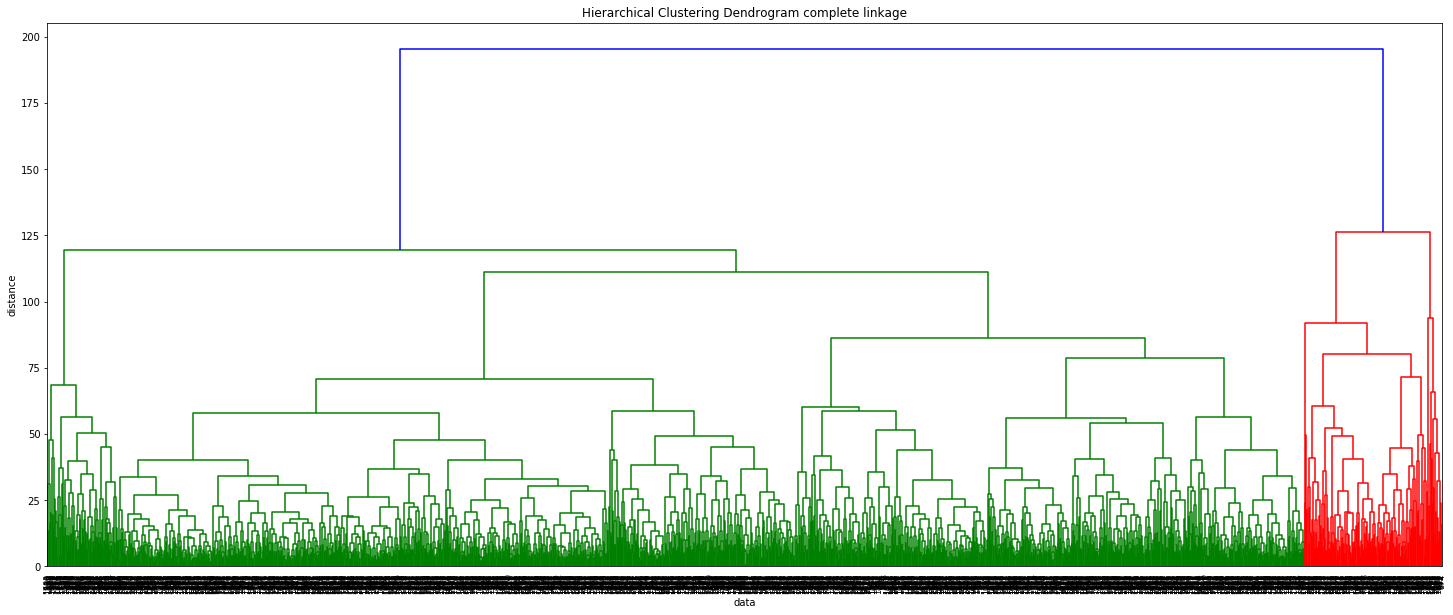

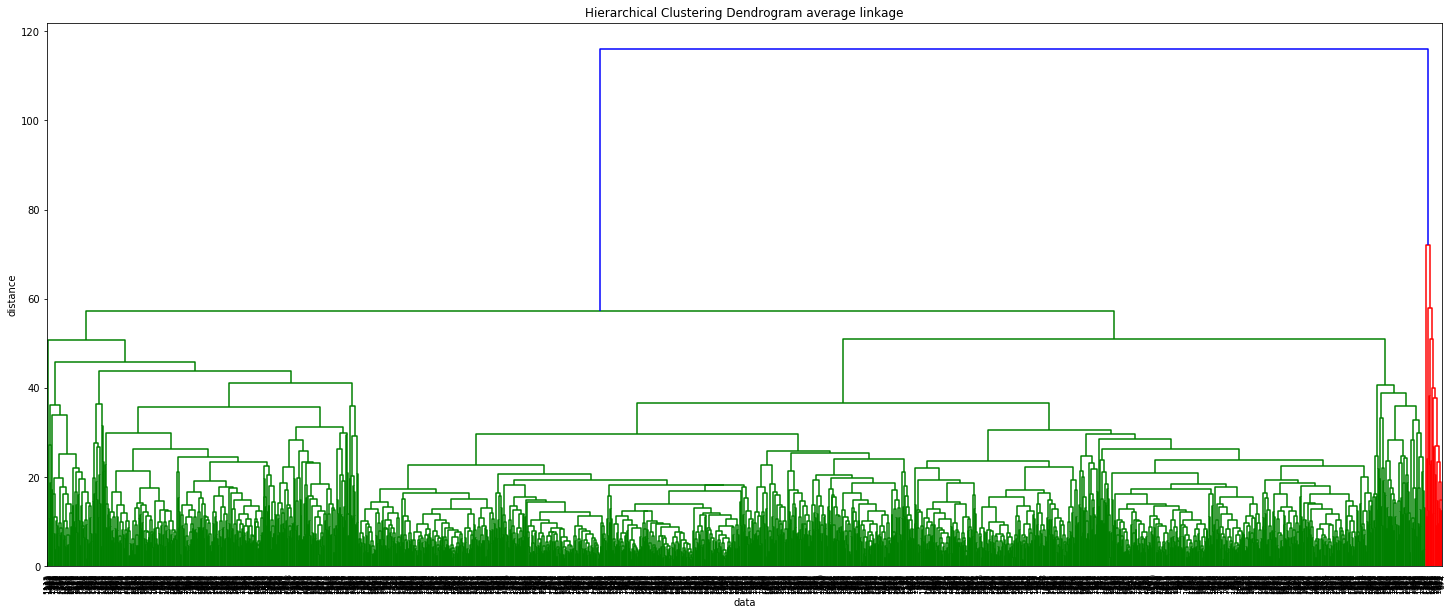

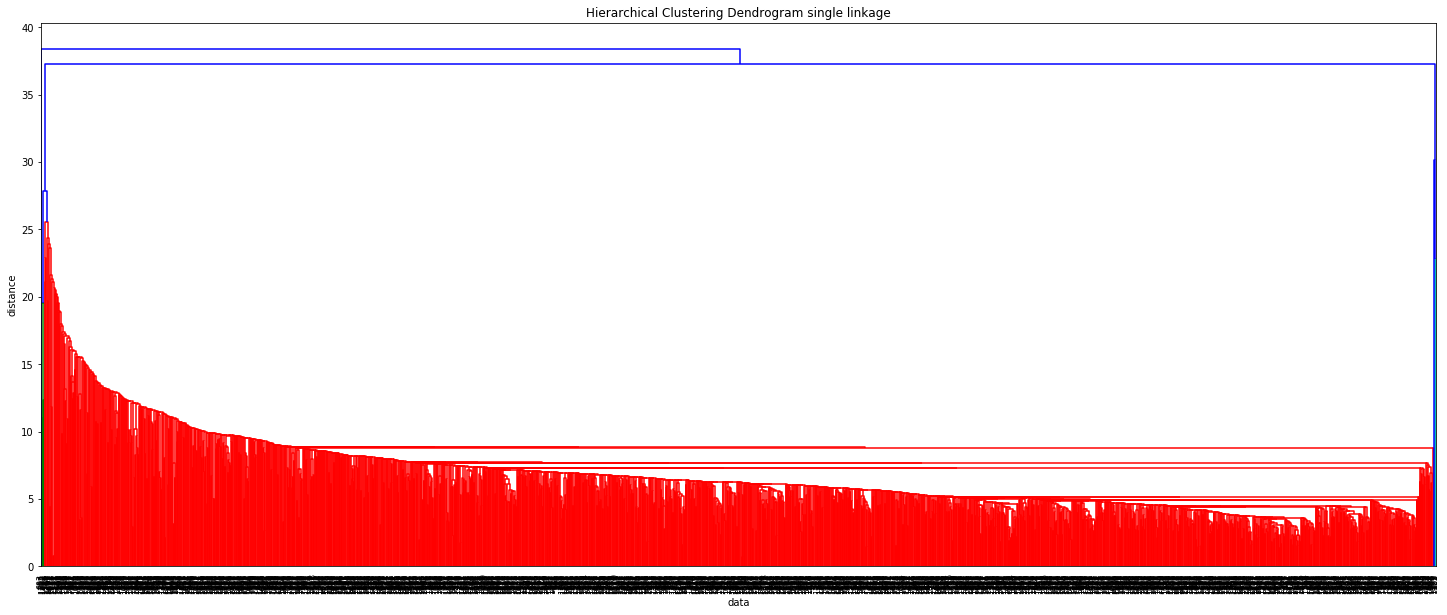

In [37]:
# apply hierarichal kolomogrov clustering only on energy feature
from scipy.cluster.hierarchy import linkage, dendrogram


hc_complete = linkage((dataSet_high[:,0:6]), "complete")
hc_average = linkage((dataSet_high[:,0:6]), "average")
hc_single = linkage((dataSet_high[:,0:6]), "single")
# dendrogram based on complete distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram complete linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

# dendrogram based on average distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram average linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

#  dendrogram based on single distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram single linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


plt.show()

#[21]

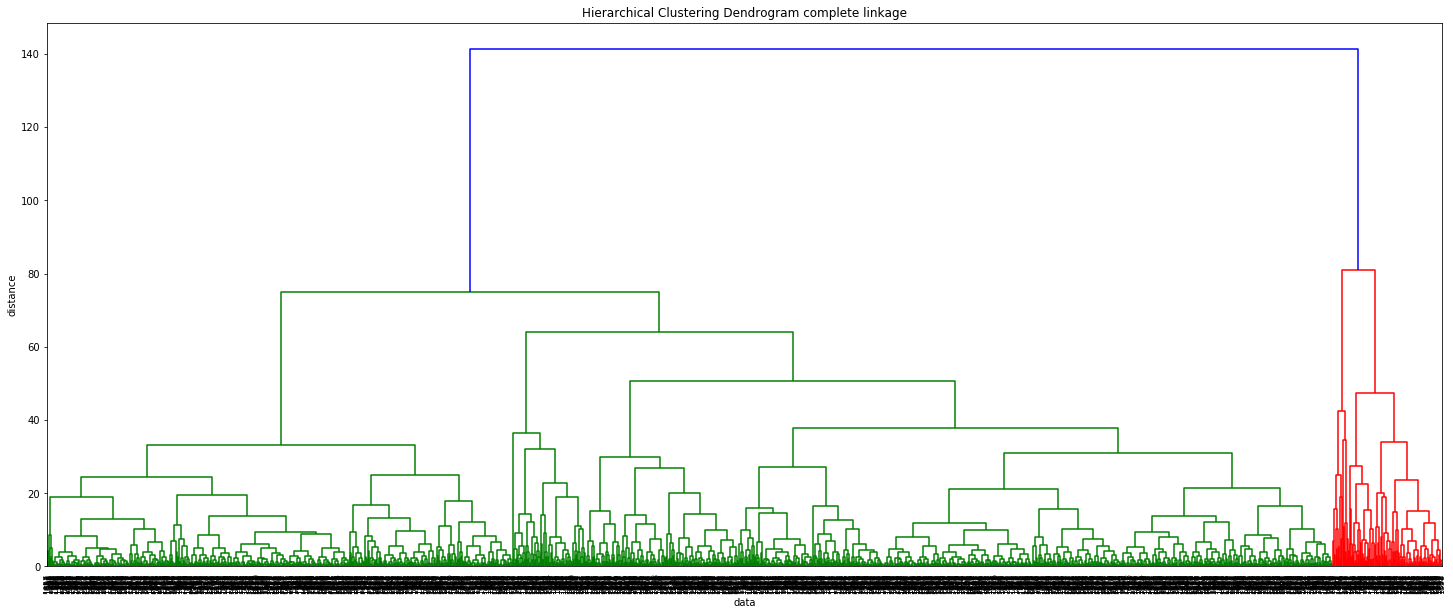

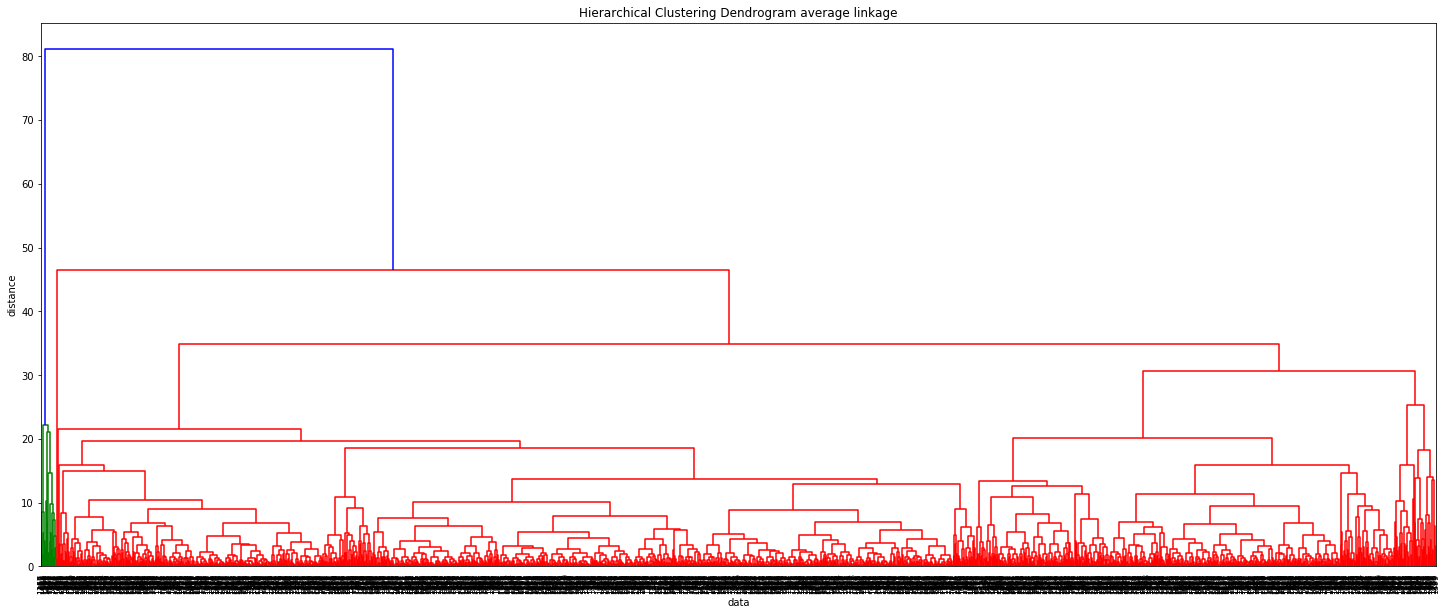

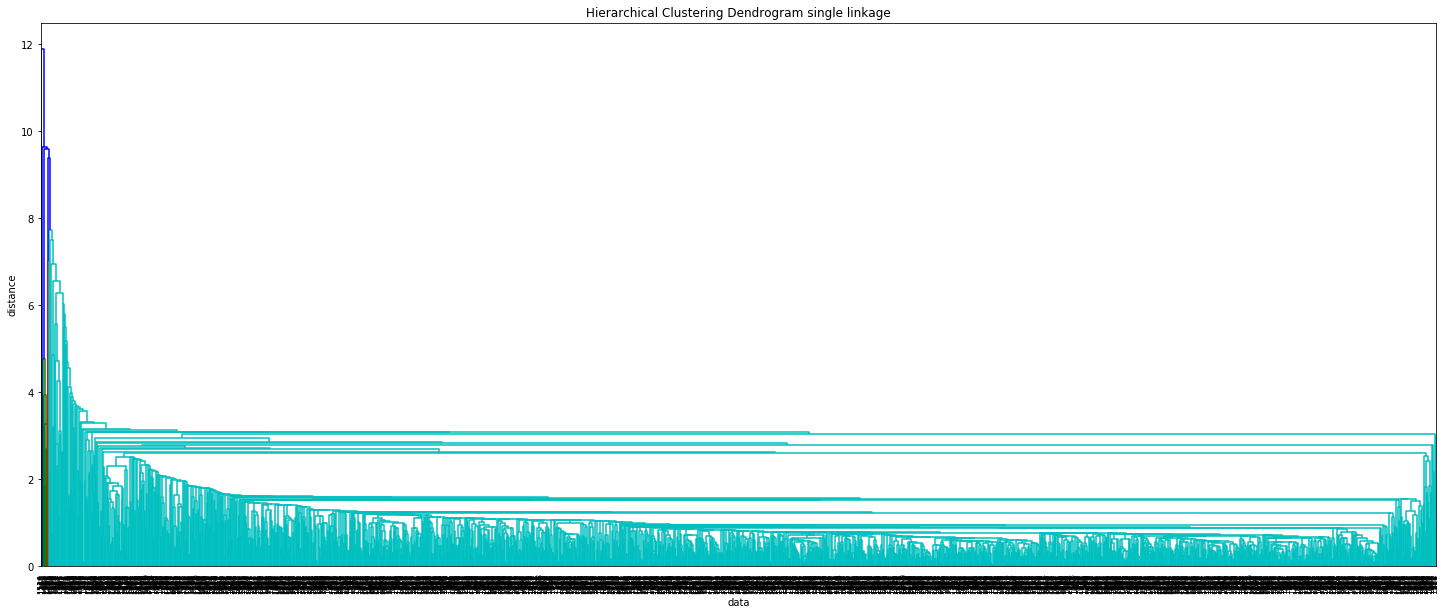

In [17]:
#### only on the first two features
from scipy.cluster.hierarchy import linkage, dendrogram


hc_complete = linkage((dataSet_high[:,0:2]), "complete")
hc_average = linkage((dataSet_high[:,0:2]), "average")
hc_single = linkage((dataSet_high[:,0:2]), "single")
# dendrogram based on complete distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram complete linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

# dendrogram based on average distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram average linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

#  dendrogram based on single distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram single linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


plt.show()

#[21]

### Summary:

In this notebook we practiced  two algorithm for clustering.
Kmeans cluster and support vector machine(SVM),
In paper [A] these sound files were processed and got a satisfactory accuracy, for the SVM the accuracy was almost 45% but with differnt type of features.
So this data can be clustered using different clustering methods.
Machine learning algorithms can be divided into 3 broad categories — supervised learning, unsupervised learning, and reinforcement learning.
Supervised Learning algorithms:
* Decision Trees
* Naive Bayes Classification
* Naive Bayes Classification
* Logistic Regression
* support victor machine
* K-means
and much more.[22]

Unsupervised learning:
* hierarchical clustering
* k-means
* mixture models
* DBSCAN
* OPTICS algorithm[22b]


I used the processed data that I downloaded from github [B],to extract the features by using the percentile function, I sorted each row in every matrix and then took percentile 95% for each row. From the histogram it can be seen that the data isn't normally distributed so,a better metric by far are percentiles, because they allow us to understand the distribution. But there is alimitation for using percentile  If you want to calculate the 95th percentile, that I need to sort all your values from least to greatest, then find the value at data array[22a]

This works fine for small data that fits in memory, but simply fails when you have terrabytes of data spread over a cluster of servers,For larger datasets, T-Digest will begin to trade accuracy for memory savings so that your node doesn't explode.[C]


Before starting validation and testing I  visualized the data using pair plot and also visualize the capability feature selecting using PCA,and visualize for every feature seperately using PCA plot and Pair plot,
By visualizing the raw data,It was clear that this features  aren't suitable for clustering and building the model good for prediction.Furthermore, the shape of the data has impact on the success of K-means. since the data are streched towards the diagonal. As k-means only considers the distance to the nearest cluster center.in this case k-means failed to handle this kind of data [26]

Before testing the model, the model was validated by using different techniques of cross validation.There are types of cross valdition such as: 

* k-folds cross validation which 
The metadata splitted in 5 different Folds based on the 5 major categories which they are(Animals,	Natural soundscapes & water sounds ,Humanand non-speech sounds,	Interior/domestic sounds,Exterior/urban noises)
every Fold has  50 semantical classes(such as dog,clock tick..est) (with 40 examples per class)[B]
A model is trained using K-1 of the folds as training data,the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy

In the metadata there are 5 folds, based on the k-fold function ,I splited the data to 5 Folds

* Leave one out:
Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.
[22b]

* repeated kfolds 
Repeats K-Fold n times with different randomization in each repetition.
[23]

* StratifiedShuffleSplit validation
Provides train/test indices to split data in train/test sets.[24]

The models was validated before testing to prevent overfiiting, and underfitting .Overfitting refers to a model that models the training data too well,underfitting refers to a model that can neither model the training data nor generalize to new data.

For evaluating the details of classification accuracy is important, as often the types of mistakes made by a classifier are not equally good or bad. One can do this by looking at the confusion matrix and its summaries, including precision and recall, and looking at the ROC curve if applicable and the area under the curve.[25]

After validation the data, and it can be noticed that the acuuracy of all the techniques and all the dataSets_high, and all features, are deficient, but I went further by testing the data.

I splitted the data to training and test data based on Pareto principle [25b]
During testing the data ,In term of desining an effective SVM model, values of parametersin SVM have to be chosen carefully in advance, include the following: (1) regularization param-eter C, which determines the tradeoff cost between mini-mizing the training error and minimizing the complexityof the model; (2) parameter sigma of the kernelfunction which defines the non-linear mapping from the input space to some high-dimensional feature space. This investigation only considers only the Gaussian kernel, the variance of whose function is sigma squared r2; (3) a kernelfunction used in SVM, which constructs a non-linear decision hypersurface in an input space[[D]

Furthermore,There are several other parameters that you can provide to the KMeans method. Some of them are as follows.

You can utilize the init parameter, which determines how the initial clusters are placed in step 1 of the algorithm. One of the values you can provide for this parameter is “k-means++”, which is an optimization of the algorithm by choosing initial cluster centers in a smart way to speed up convergence.

You can also provide a max_iter parameter, which is the maximum number of iterations of the algorithm for each run. By default, this value is 300.

Another parameter you can utilize is n_init which sets the number of times the K-Means clustering algorithm is run, each time with different initial centroids. By default, the algorithm will run 10 times. The best result of all the runs of the algorithm is chosen and used as the final output.[E]

I figure out that varying the features has no impact that can be seen since all the tested features gave low accuracy as shown in tables (1,2).

After K-means, SVM was used and the accuracy for different models of the SVM was also deficient,as it can be seen on table(3).

I did the same steps with the tract sound files,but It seems that the features (E,s_tract,f_tract) was not informative, so I needed to extract more features from them using also the percentile 95% ,instead of one matrix, I took the percentile of every  20 row, I tried different extraction for features, then I had like 4 features for E, 4 other features for s_tract,and finally 4 for f_tract.
Furthermore, while proccessing all the features, unfortunately, I failed to make good model.
Regards to PTNE processing file,I  tried taking the average of the sex feature were gotten after percentile the PTNE features and got one feature for each of them,also I tried the average besides the standard deviation at the same time instead of percentile, I got the same results and got deficient accuracy. I had doubt that what I'm doing is wrong so I tried KNN on the same dataSet and I got also the same accuracy.

As a conclusion, this features which extracted from the original PTNE features or from the tract features were unsuitable to make clustering ,for both K-means and SVM algorithems,according to all the steps I done from validation till testing.



references:

[A] [ESC: Dataset for Environmental Sound Classif](https://www.karolpiczak.com/papers/Piczak2015-ESC-Dataset.pdf) 

[B] [ESC-50: Dataset for Environmental Sound Classification](https://github.com/karolpiczak/ESC-50)

[C] [Averages Can Be Misleading: Try a Percentile](https://www.elastic.co/blog/averages-can-dangerous-use-percentile)

[1] [Python | Pandas Index.unique](https://www.geeksforgeeks.org/python-pandas-index-unique/)

[2] [PCA example with Iris Data-set](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)

[3] [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-matrix-) 

[4] [AUC ROC Curve Scoring Function for Multi-class Classification](https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659)

[5] [The Area Under an ROC Curve](http://gim.unmc.edu/dxtests/ROC3.htm)

[6] [Train/Test Split and Cross Validation in Python](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

[7] [Comparing Machine Learning Methods](https://pythondata.com/comparing-machine-learning-methods/)

[8] [sklearn.model_selection.LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

[9] [Train/Test Split and Cross Validation in Python](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

[10] [sklearn.model_selection.RepeatedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html)

[11] [BARPLOT](https://python-graph-gallery.com/barplot/)

[12] [kmeans elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/)

[13] [Elbow method (clustering)](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

[14] [Machine Learning for Diabetes with Python](https://datascienceplus.com/machine-learning-for-diabetes-with-python/)

[15] [Create a binary-classification dataset (python: sklearn.datasets.make_classification)](https://datascience.stackexchange.com/questions/39071/create-a-binary-classification-dataset-python-sklearn-datasets-make-classifica)

[16] [How to generate random colors in matplotlib?](https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib)

[17] [Matplotlib scatter plot with different text at each data point](https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point)

[18] [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

[19] [Example of Confusion Matrix in Python](https://datatofish.com/confusion-matrix-python/)

[20] [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[21] [cluster.hierarchy](https://github.com/wblakecannon/DataCamp/blob/master/19-unsupervised-learning-in-python/02-visualization-with-hierarchical-clustering-and-t-sne/03-different-linkage-different-hierarchical-clustering.py)

[22] [Chapter 14 Support Vector Machines](https://bradleyboehmke.github.io/HOML/svm.html)

[22a] [Why Averages Suck and Percentiles are Great](https://www.dynatrace.com/news/blog/why-averages-suck-and-percentiles-are-great/)

[22b] [sklearn.model_selection.LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

[23] [sklearn.model_selection.RepeatedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html)

[24] [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

[25] [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)

[25b] [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle)

[E] [What other parameters can we pass into the KMeans method?](https://discuss.codecademy.com/t/what-other-parameters-can-we-pass-into-the-kmeans-method/379388)

[26] p.176 introduction to machine learning with Python, Sarah Guido Andreas C. Mueller


